In [ ]:
!pip install biopython logomaker
!apt-get install clustalo
!apt-get install -y clustalw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 0s (705 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (

In [ ]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline
import subprocess

# Path to input and output files
input_file = "Q7KZI7.fasta"
output_file = "rcsb_pdb_8TXY.aln"

# Ensure ClustalW is installed
!apt-get install -y clustalw

# Run ClustalW to align sequences
def run_clustalw(input_file, output_file):
    try:
        clustalw_cline = ClustalwCommandline("clustalw", infile=input_file)
        stdout, stderr = clustalw_cline()
        print("ClustalW executed successfully.")
        print("STDOUT:", stdout)
        print("STDERR:", stderr)
    except Exception as e:
        print(f"Error executing Clustalw: {e}")
        raise e

# Run ClustalW
run_clustalw(input_file, output_file)


/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalw is already the newest version (2.1+lgpl-7).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
ClustalW executed successfully.
STDOUT: 


 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: Q7KZI7       788 aa
Sequence 2: Q9H0K1       926 aa
Sequence 3: Q9Y2K2      1321 aa
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  27
Sequences (1:3) Aligned. Score:  31
Sequences (2:3) Aligned. Score:  32
Guide tree file created:   [Q7KZI7.dnd]

There are 2 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:10234
Group 2: Sequences:   3      Score:8154
Alignment Score 3560

CLUSTAL-Alignment file created  [Q7KZI7.aln]


STDERR: 


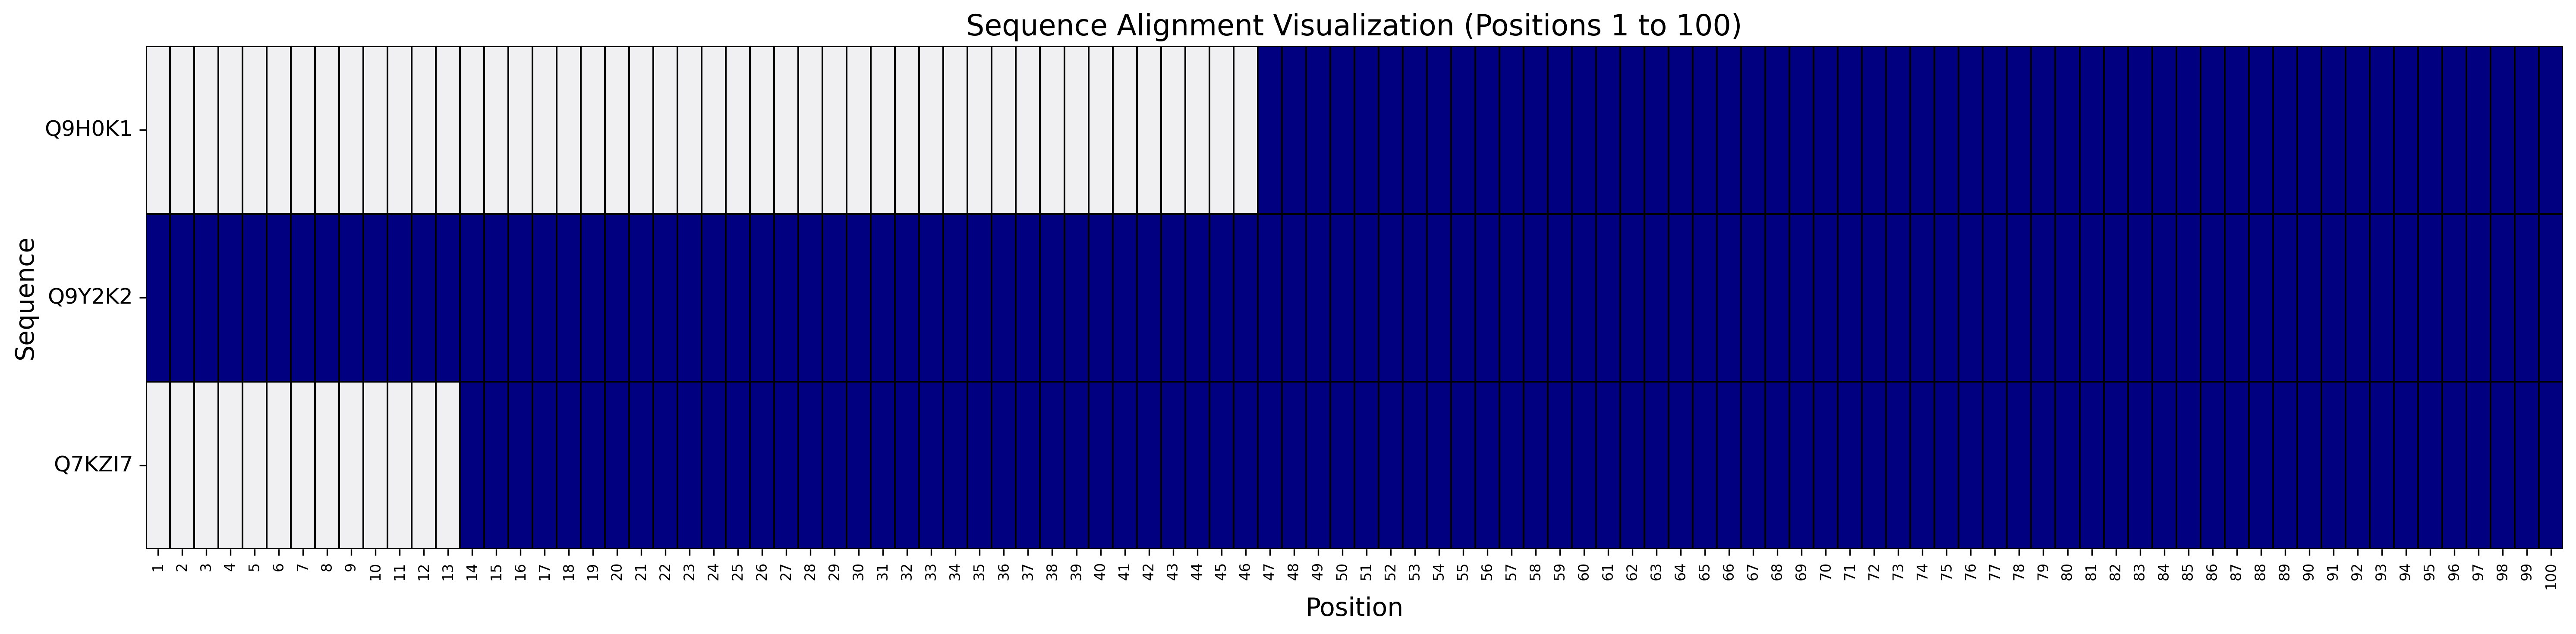

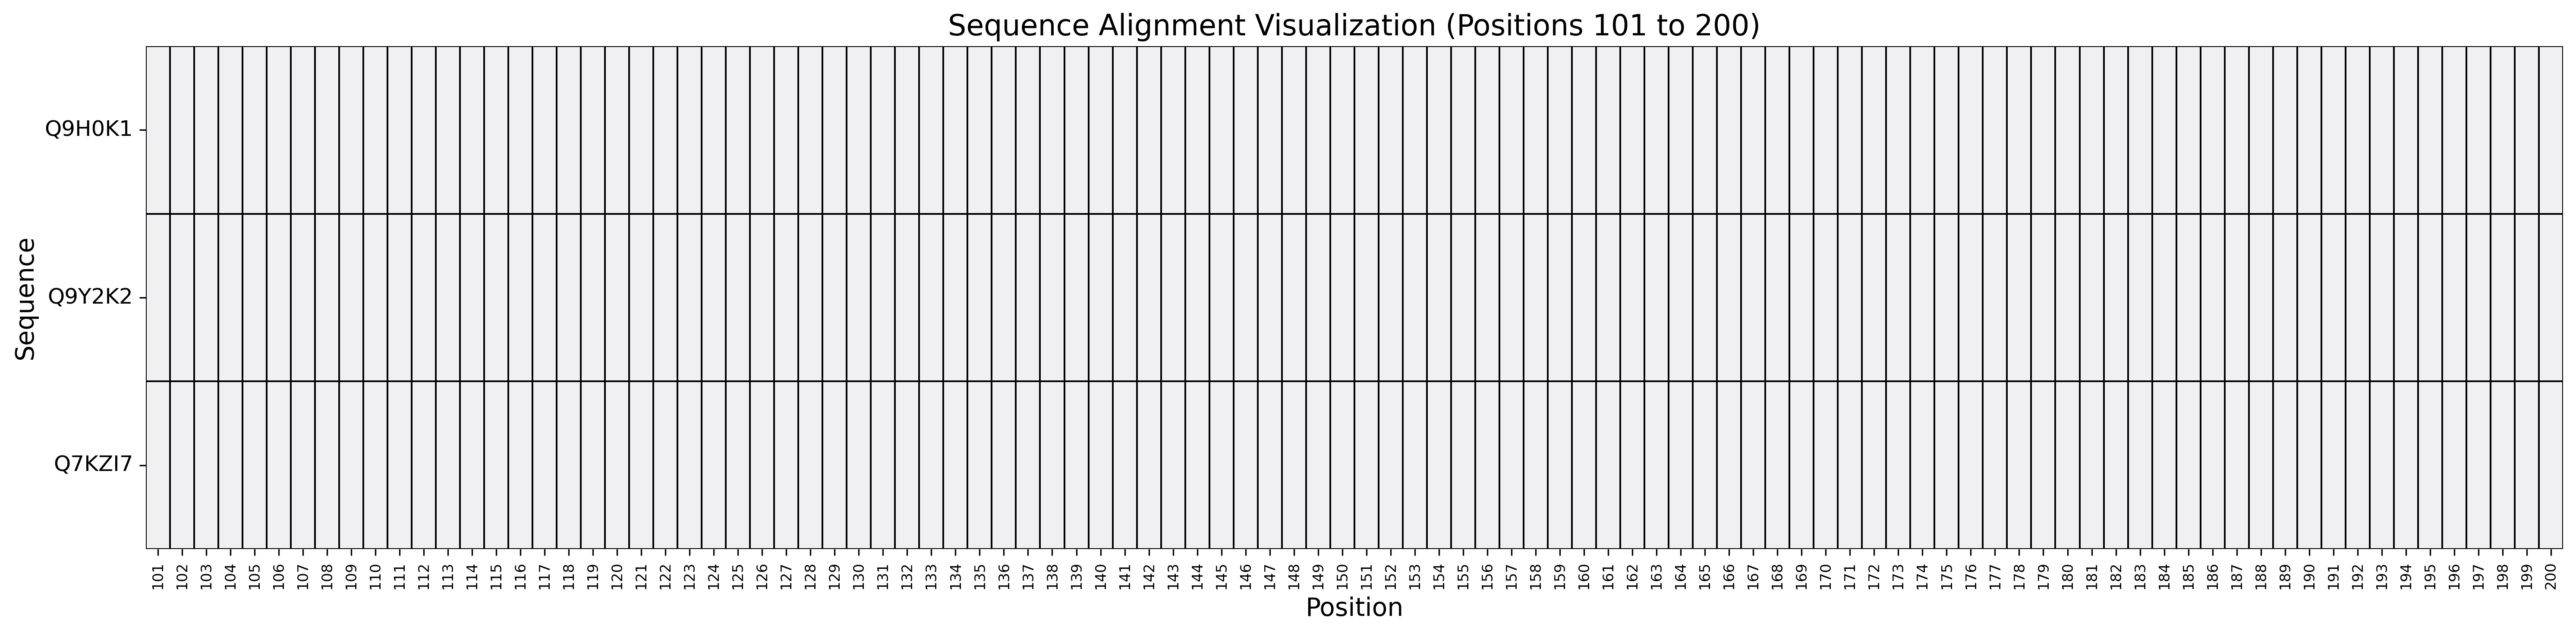

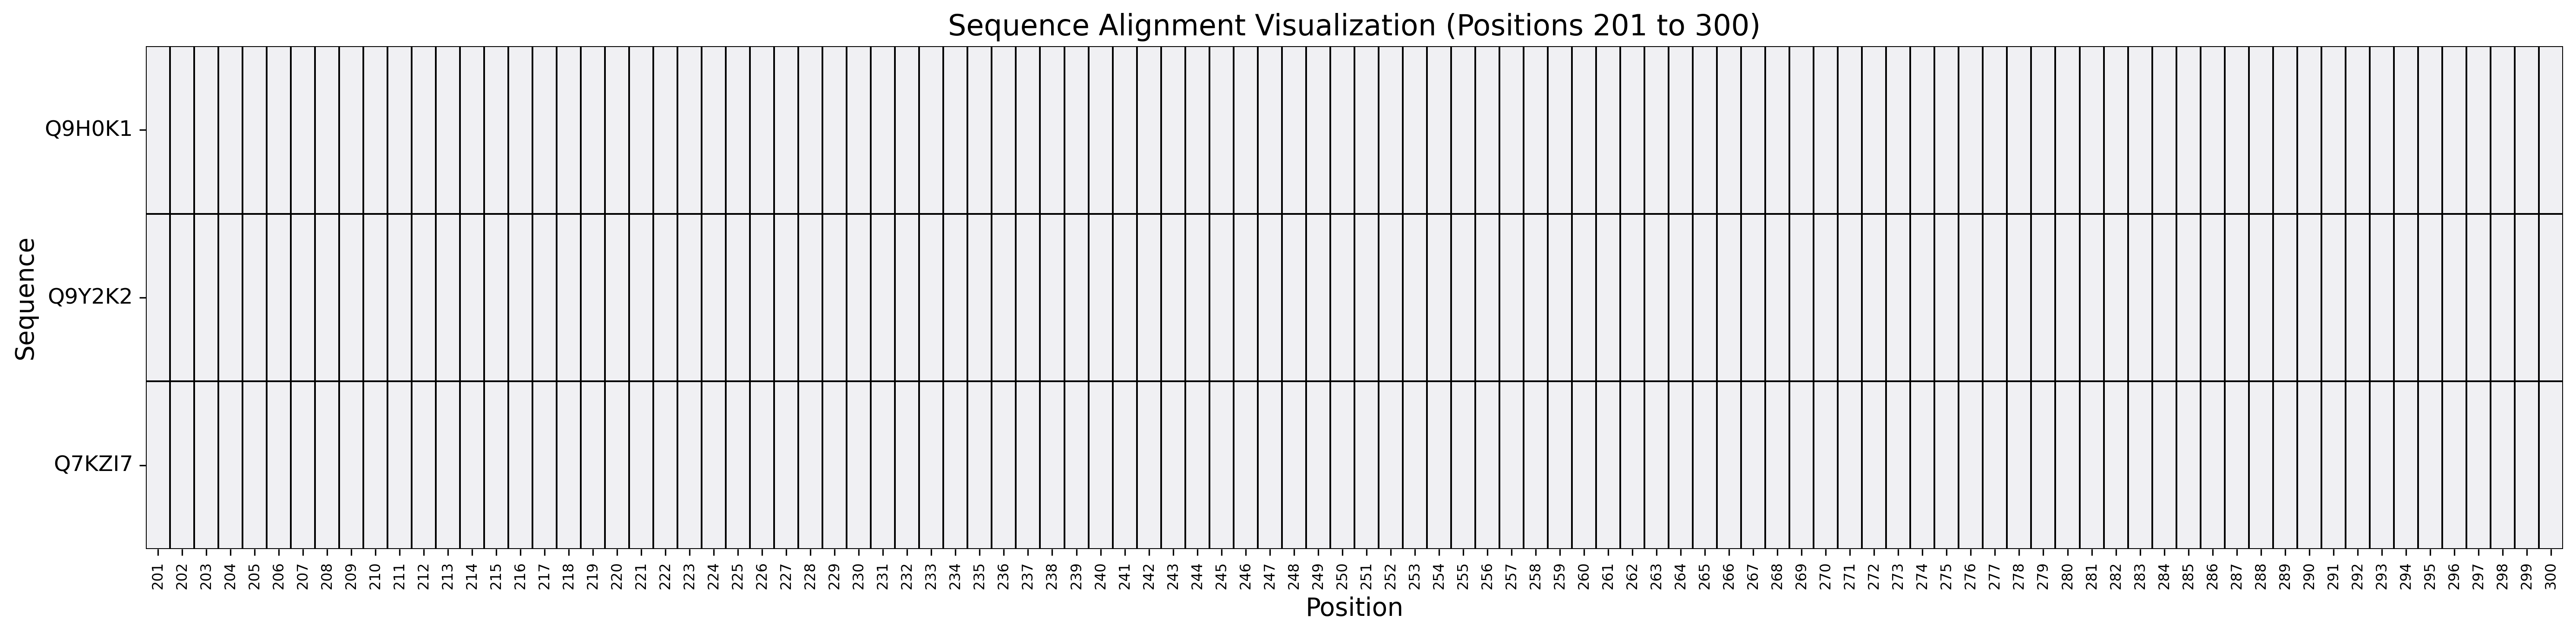

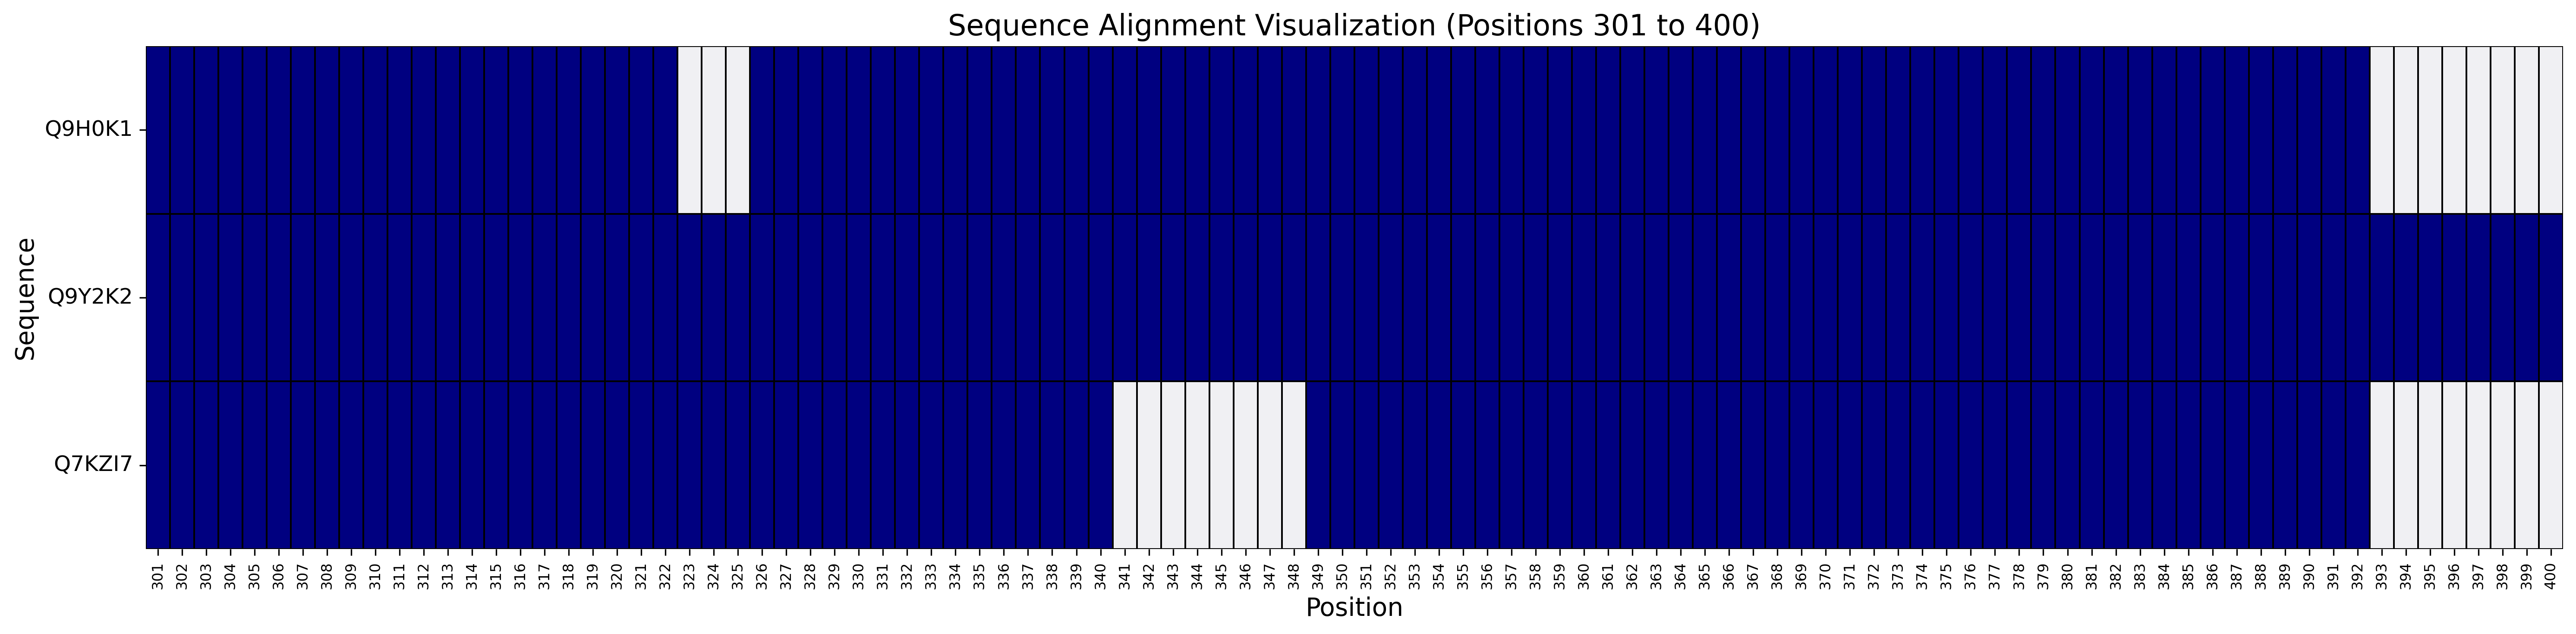

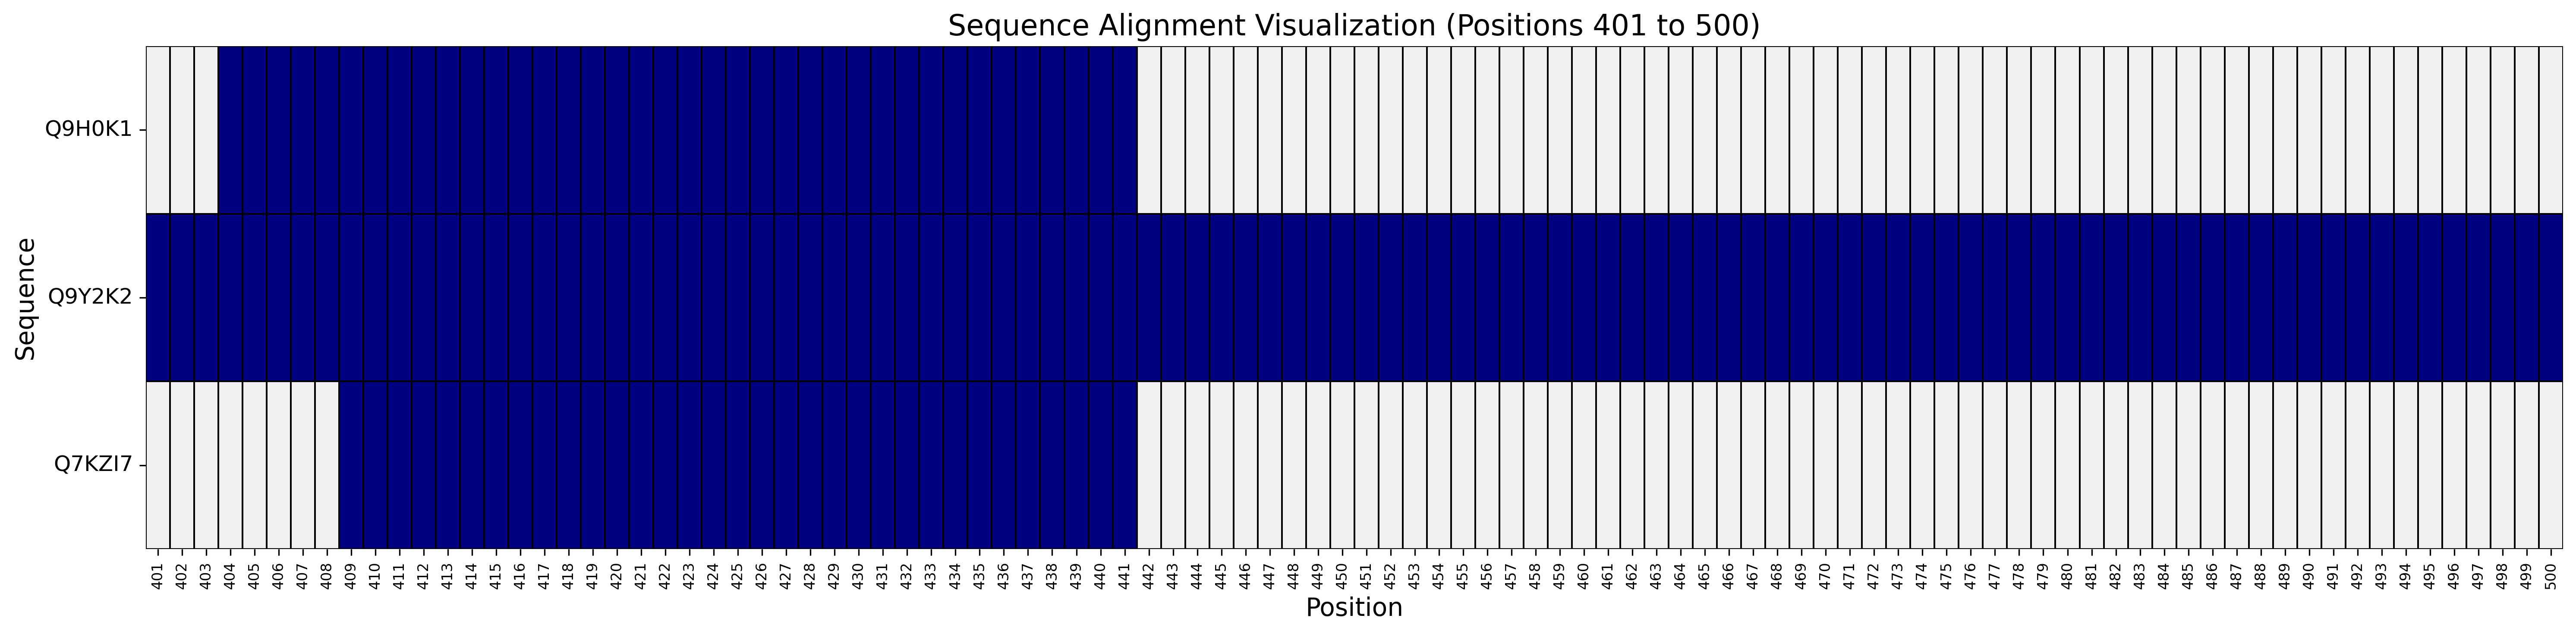

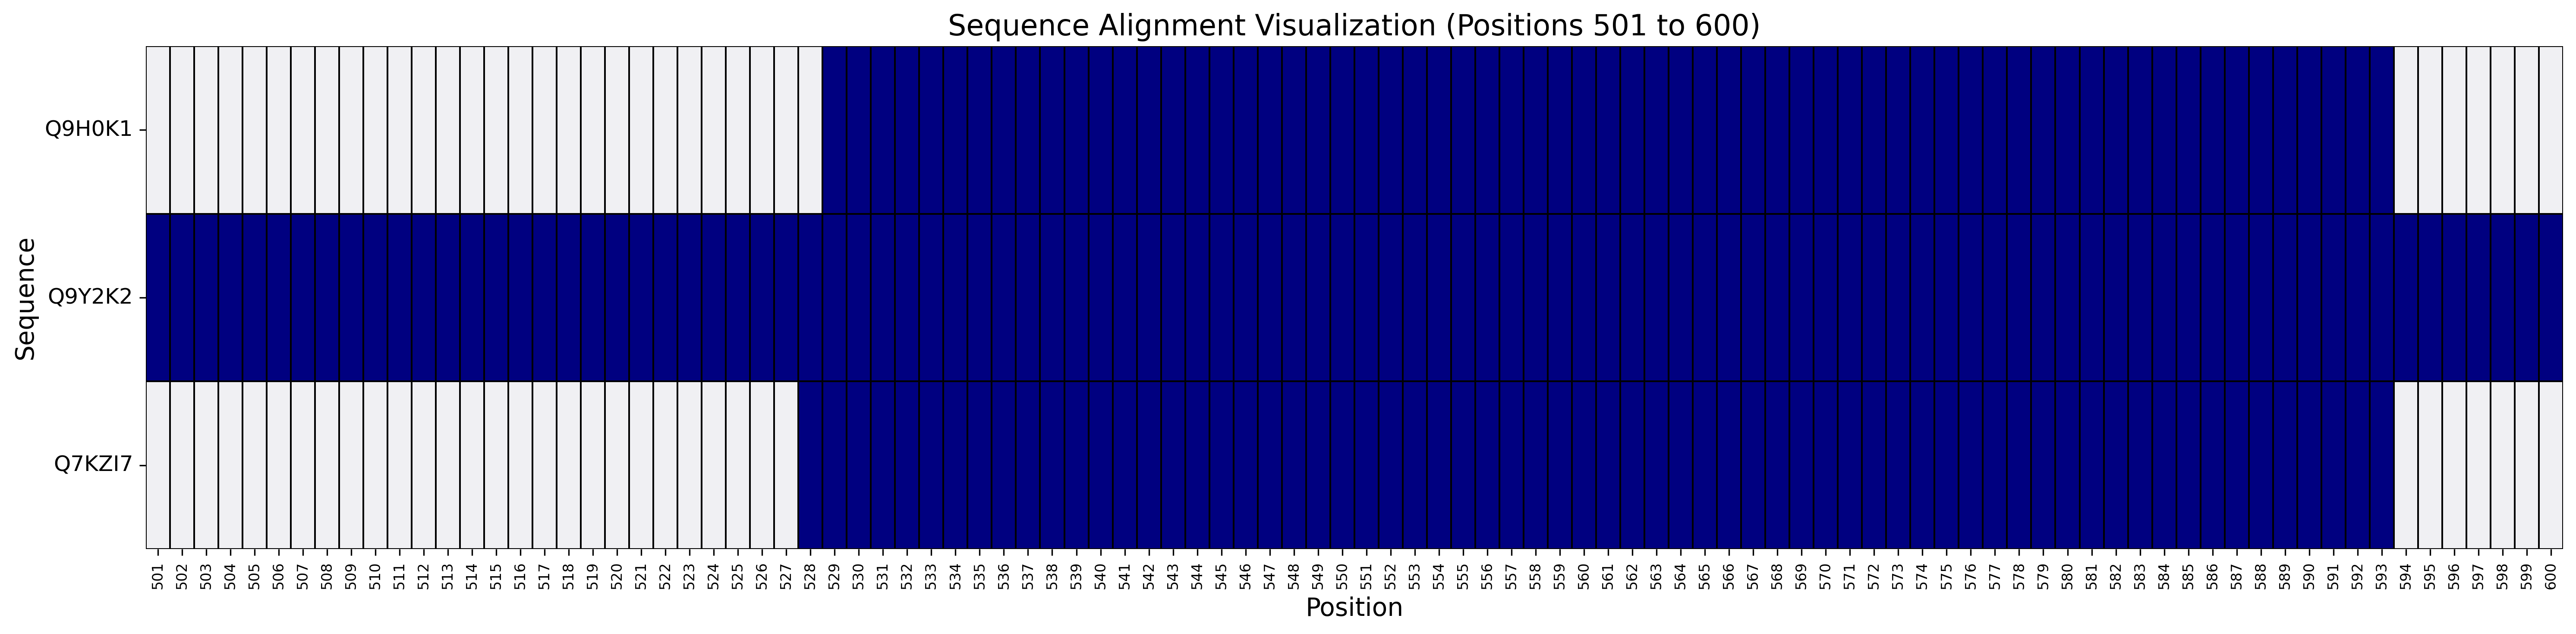

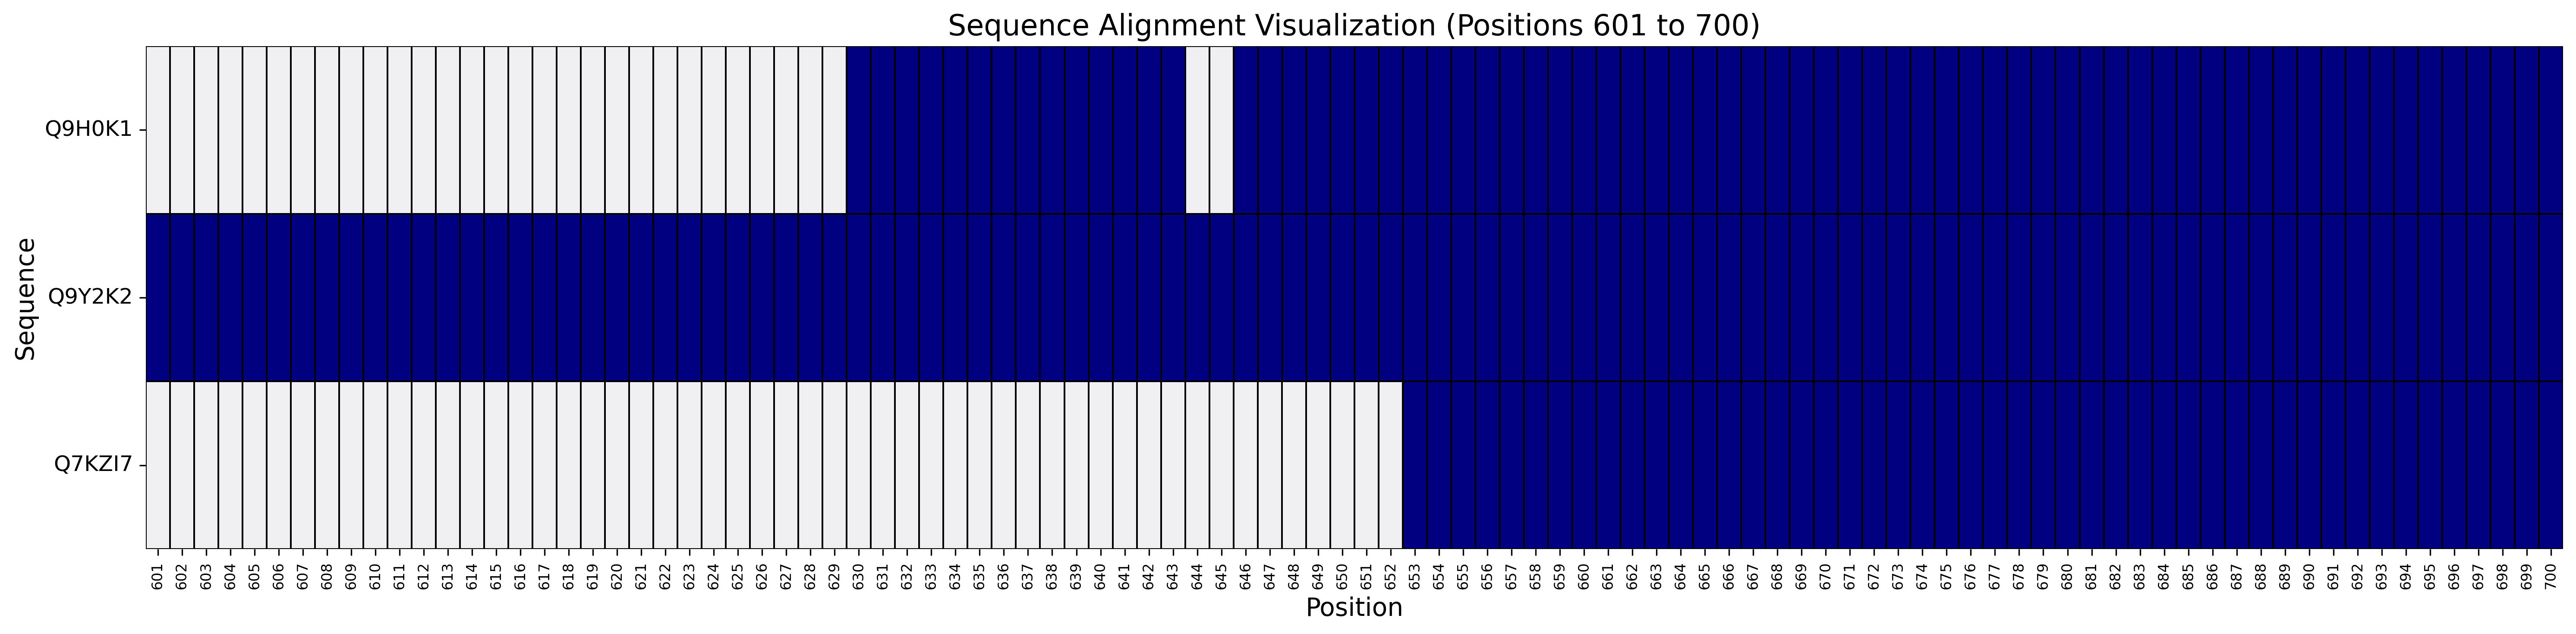

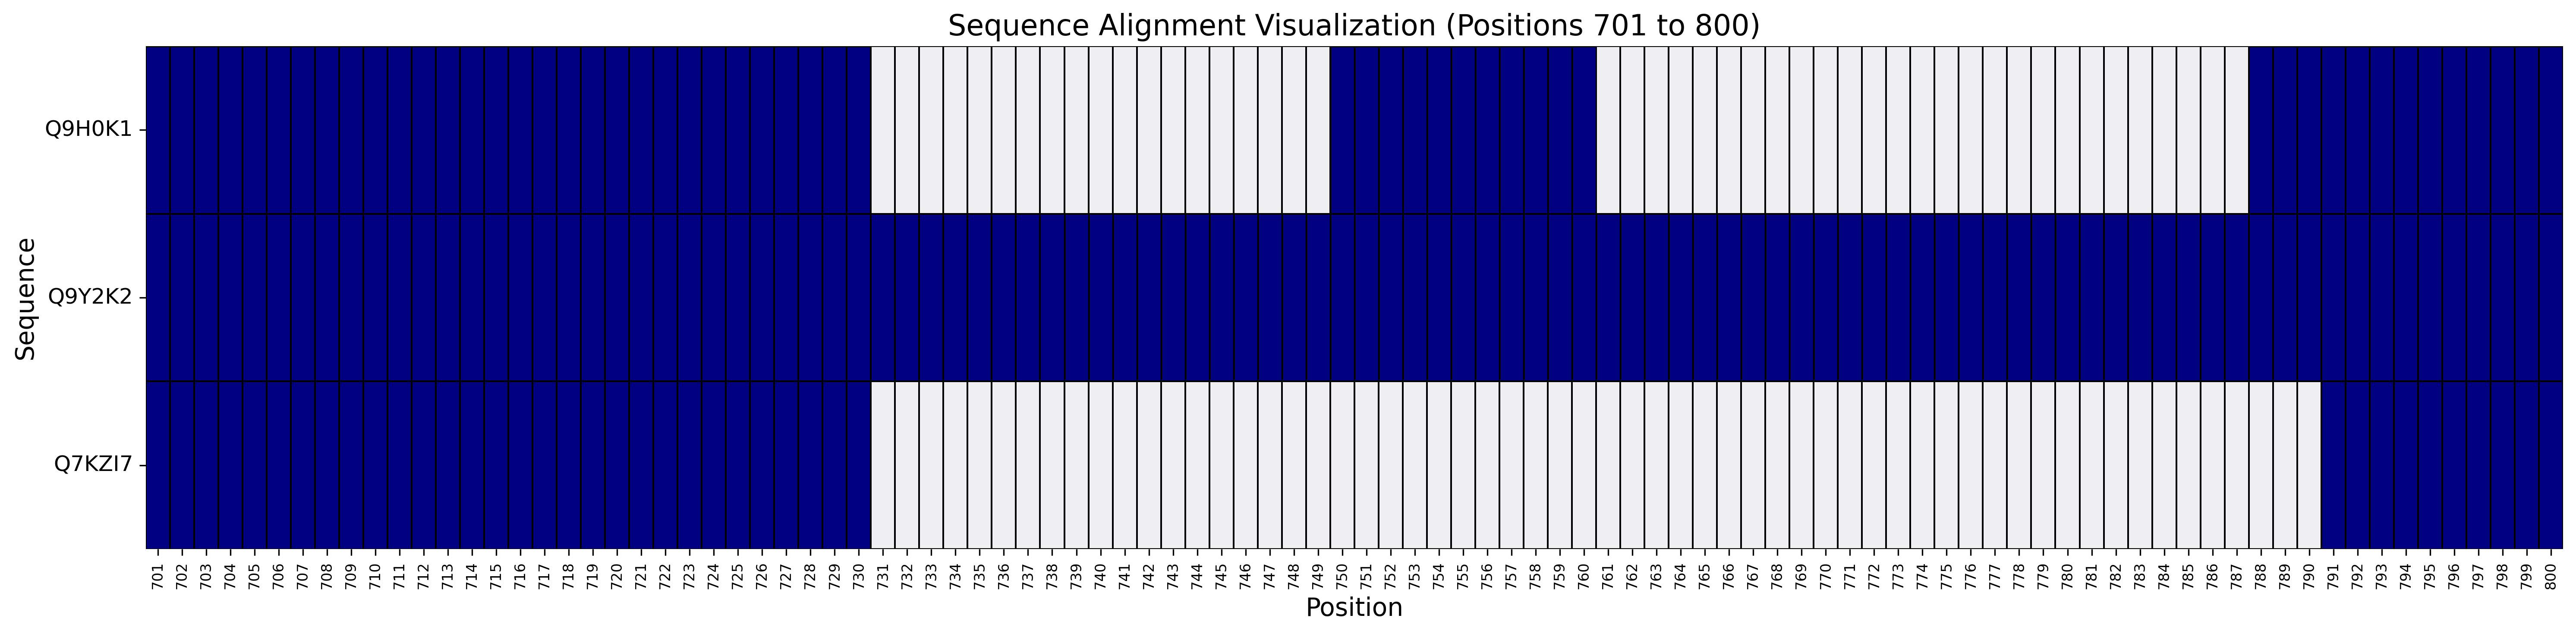

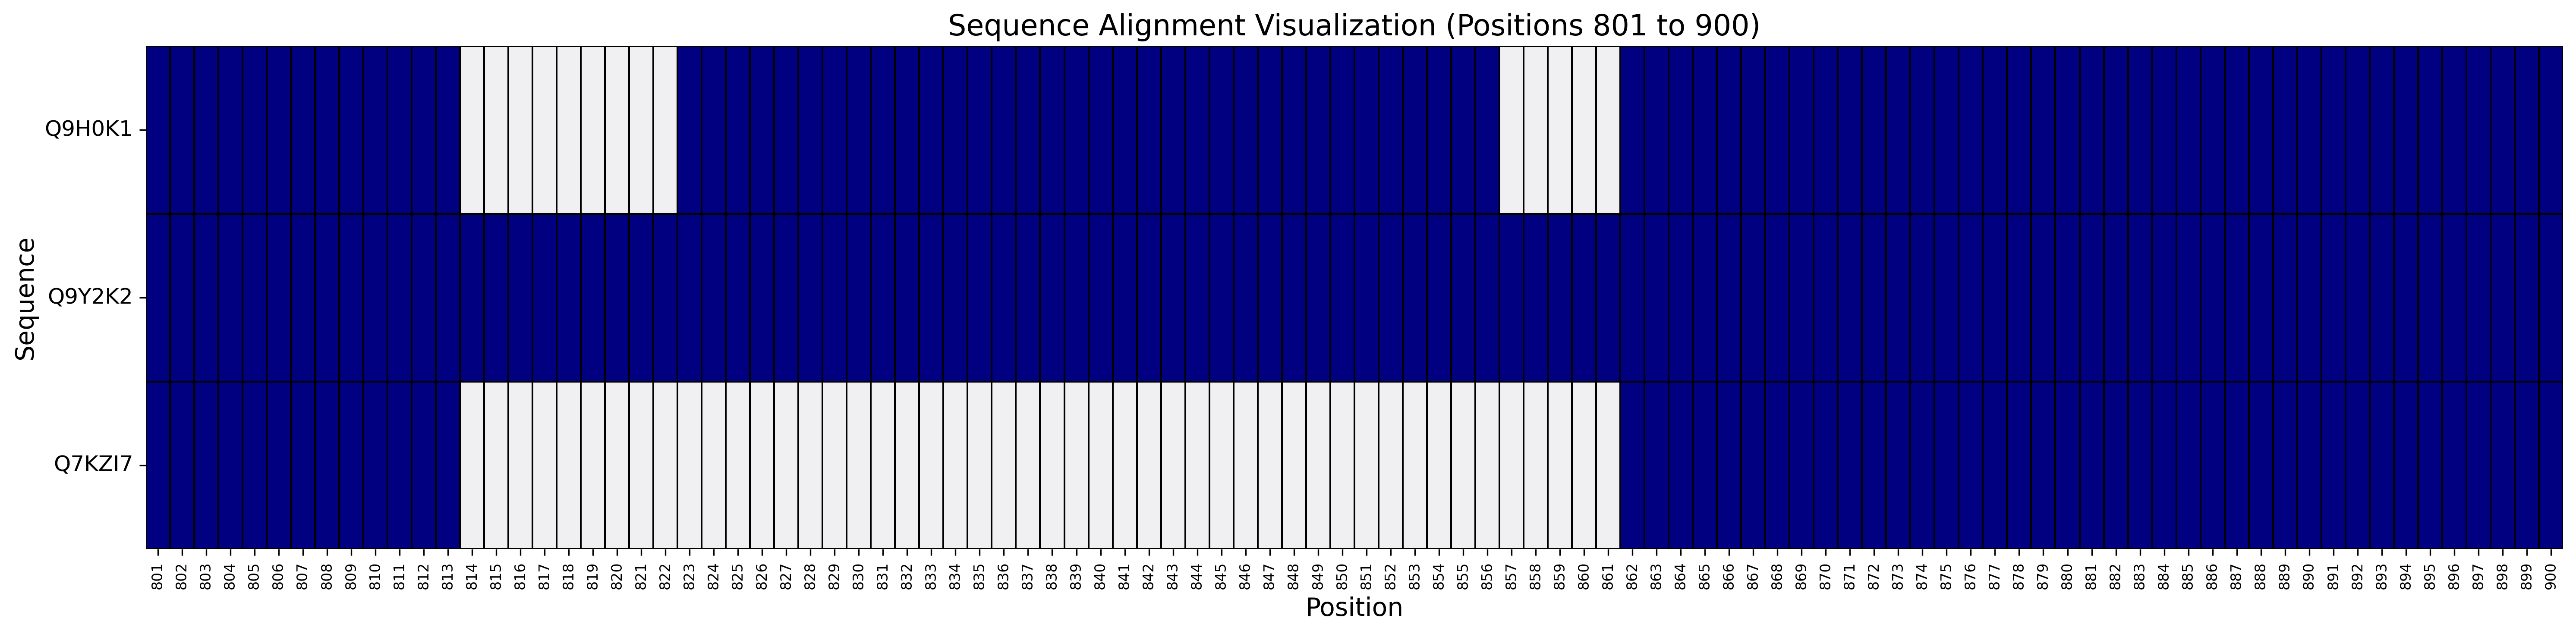

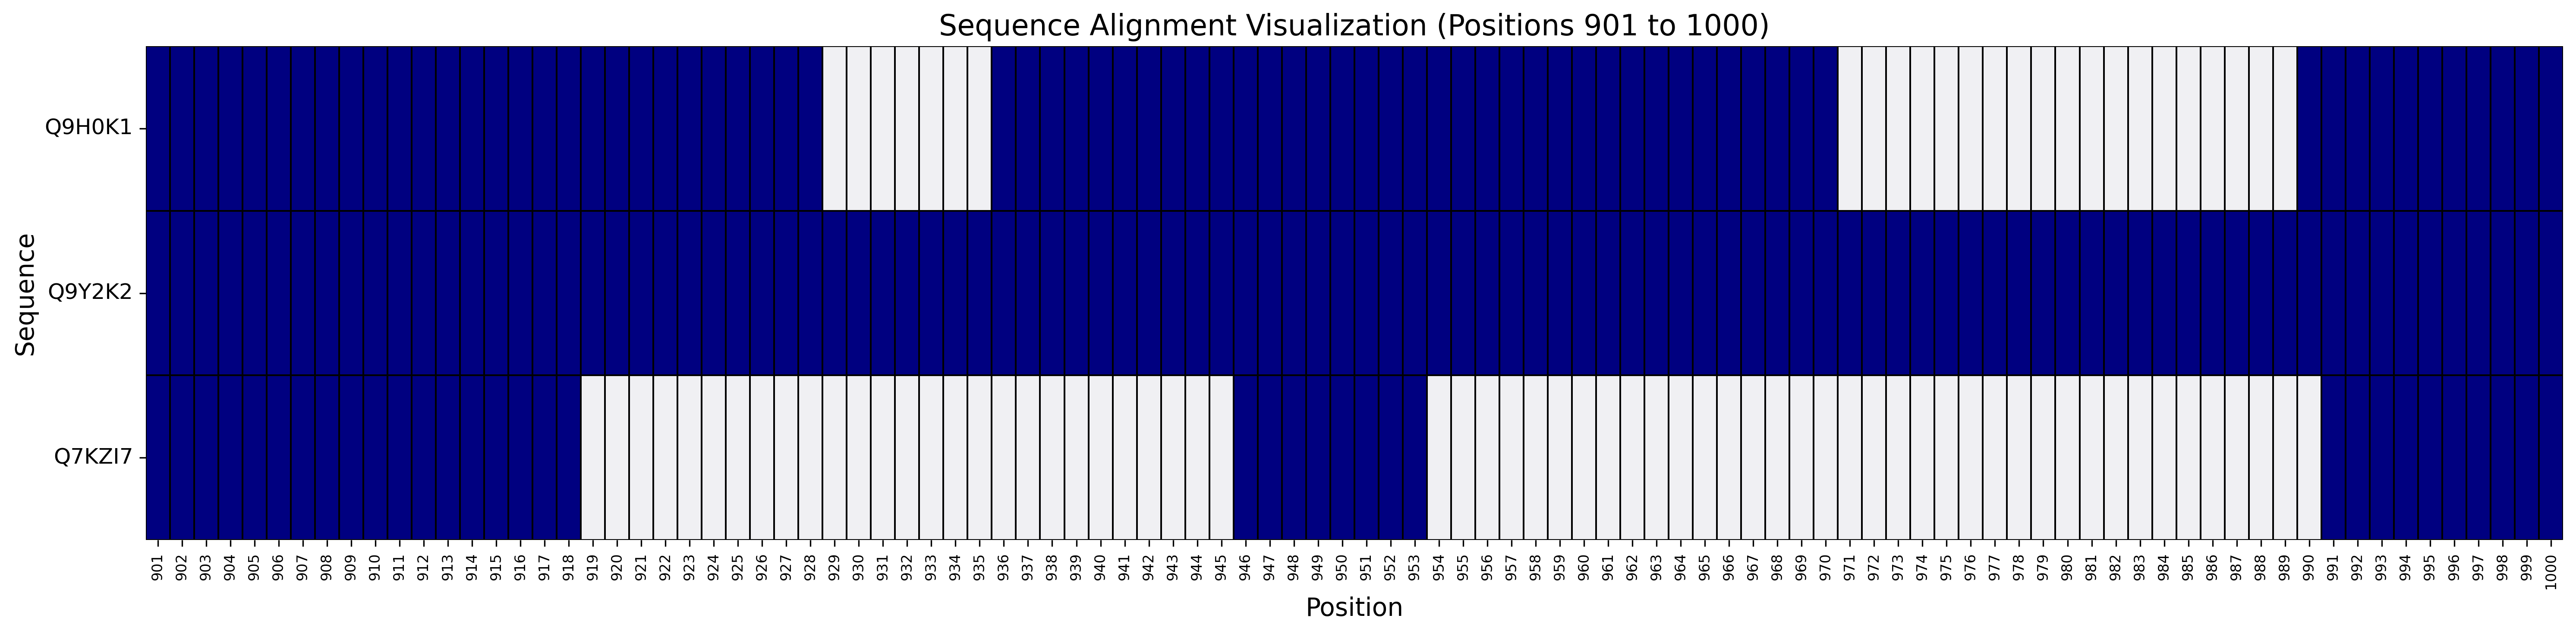

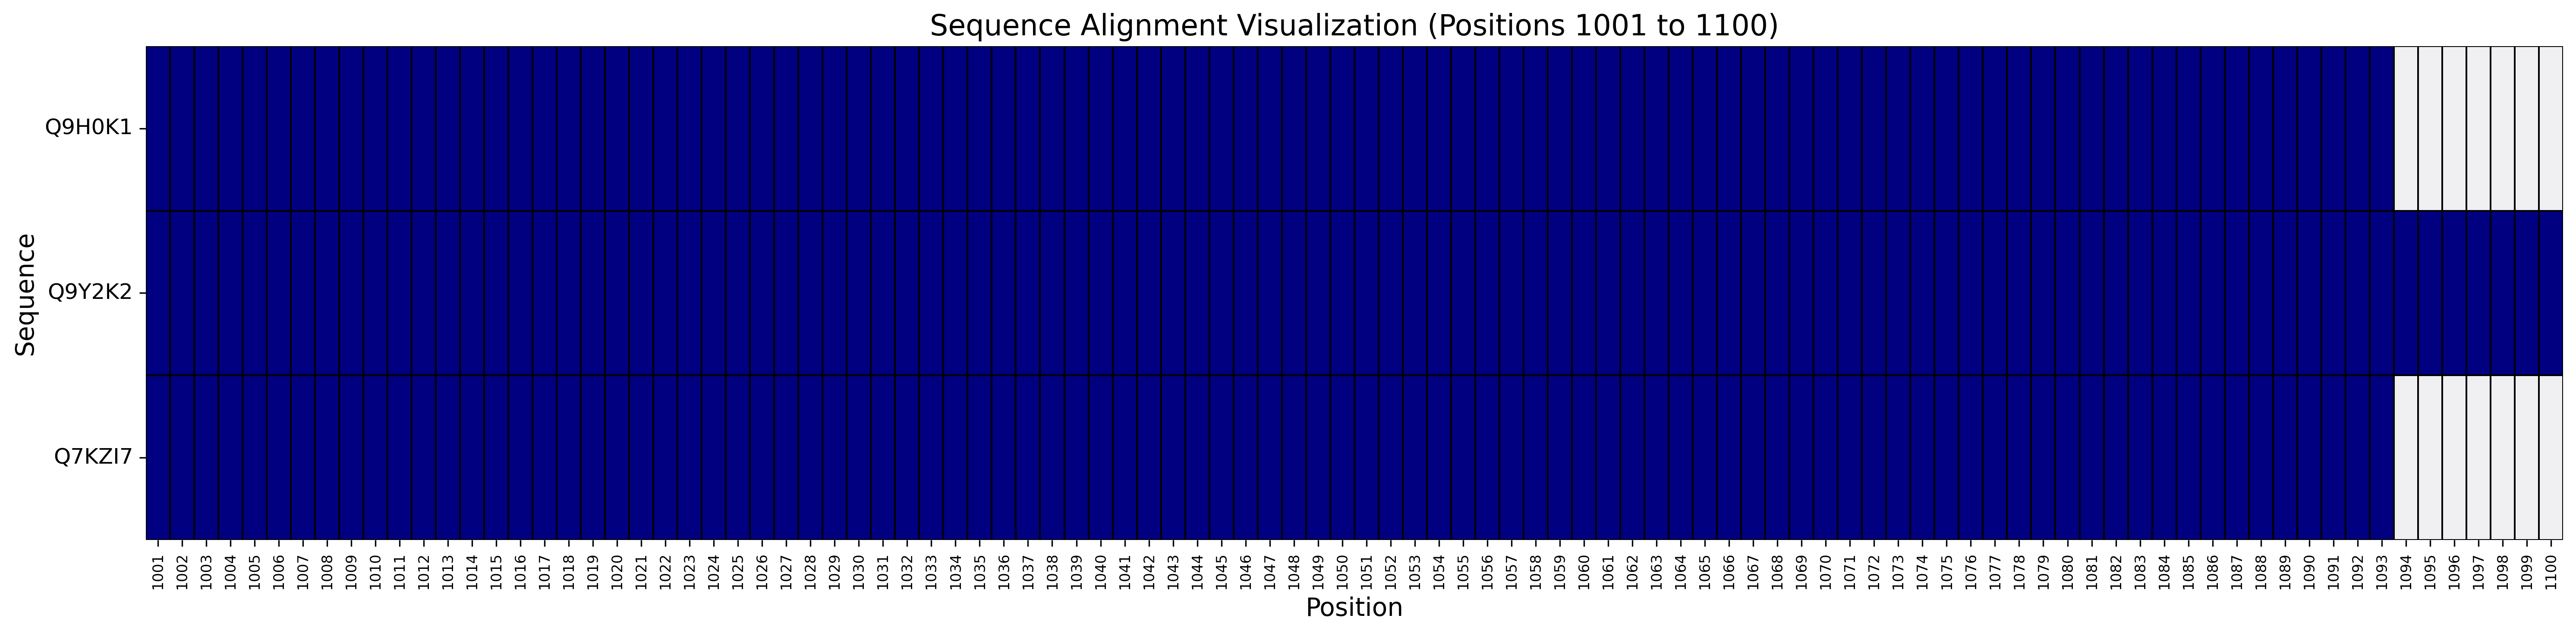

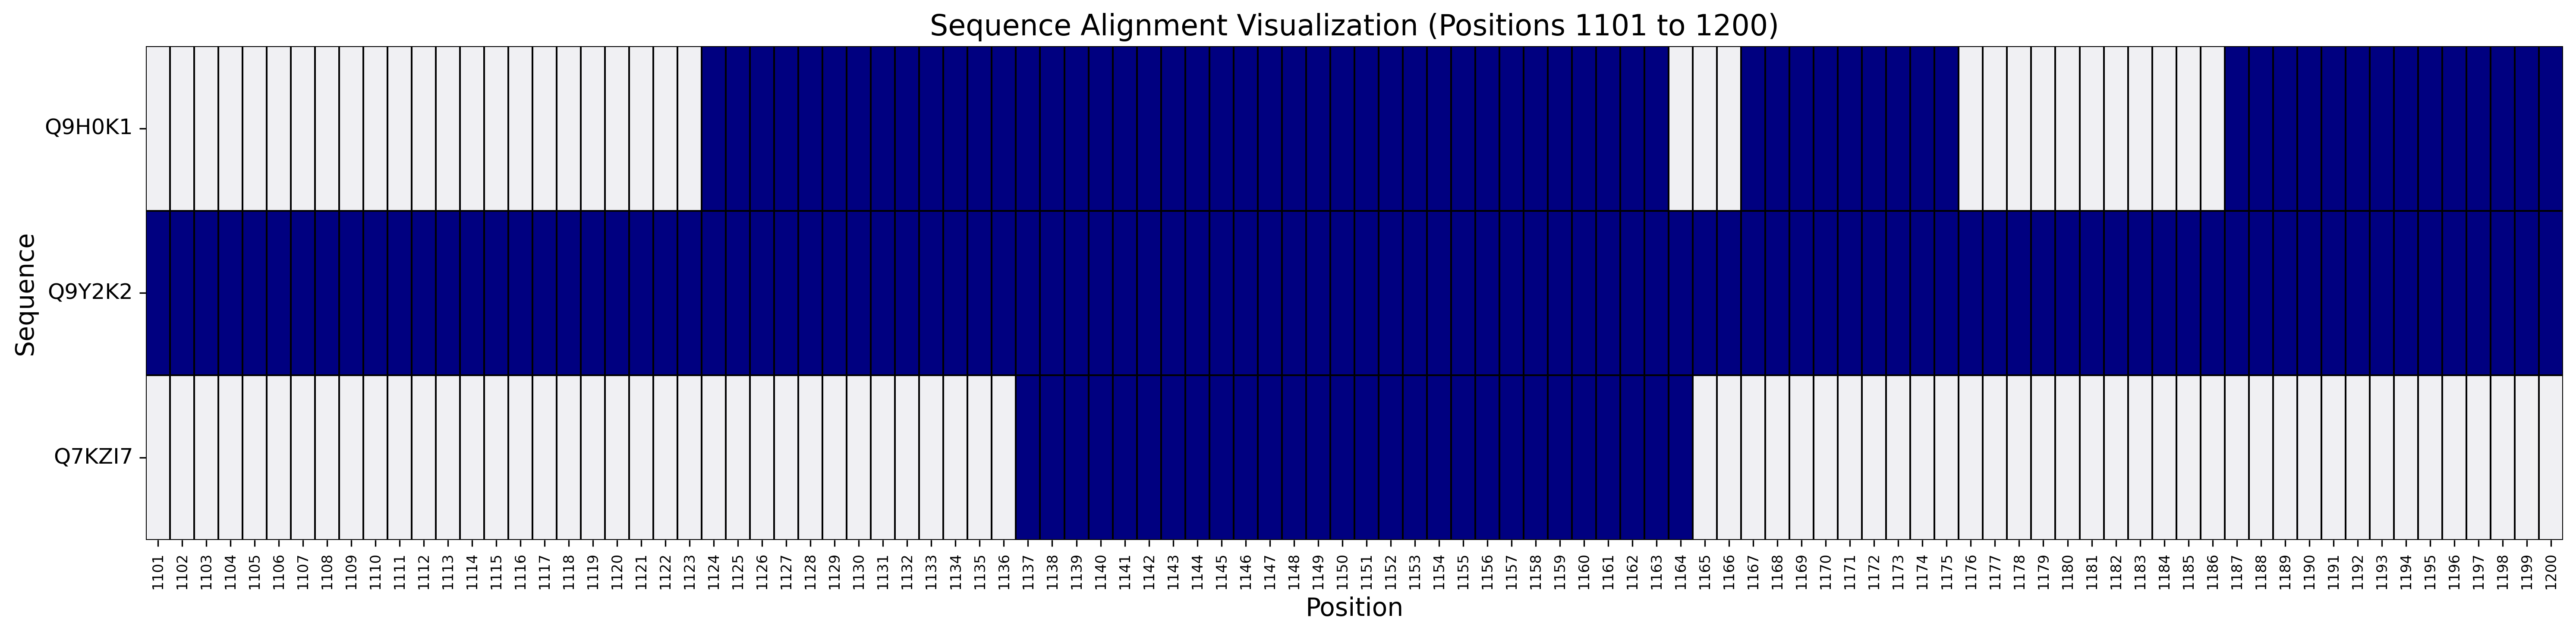

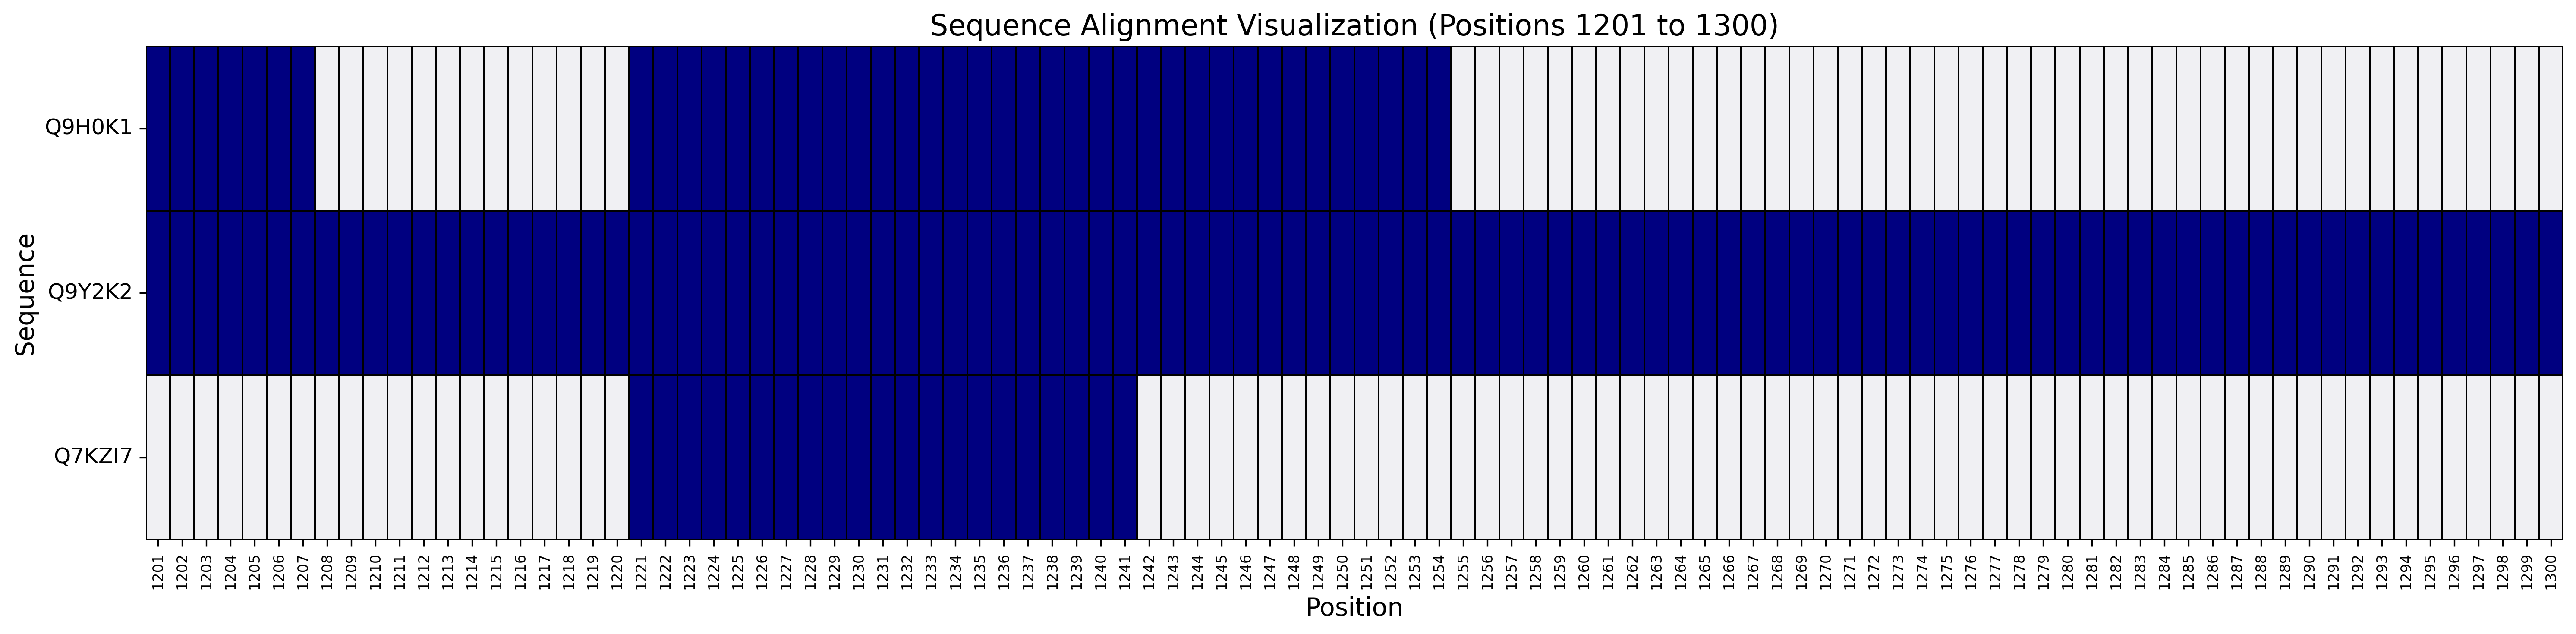

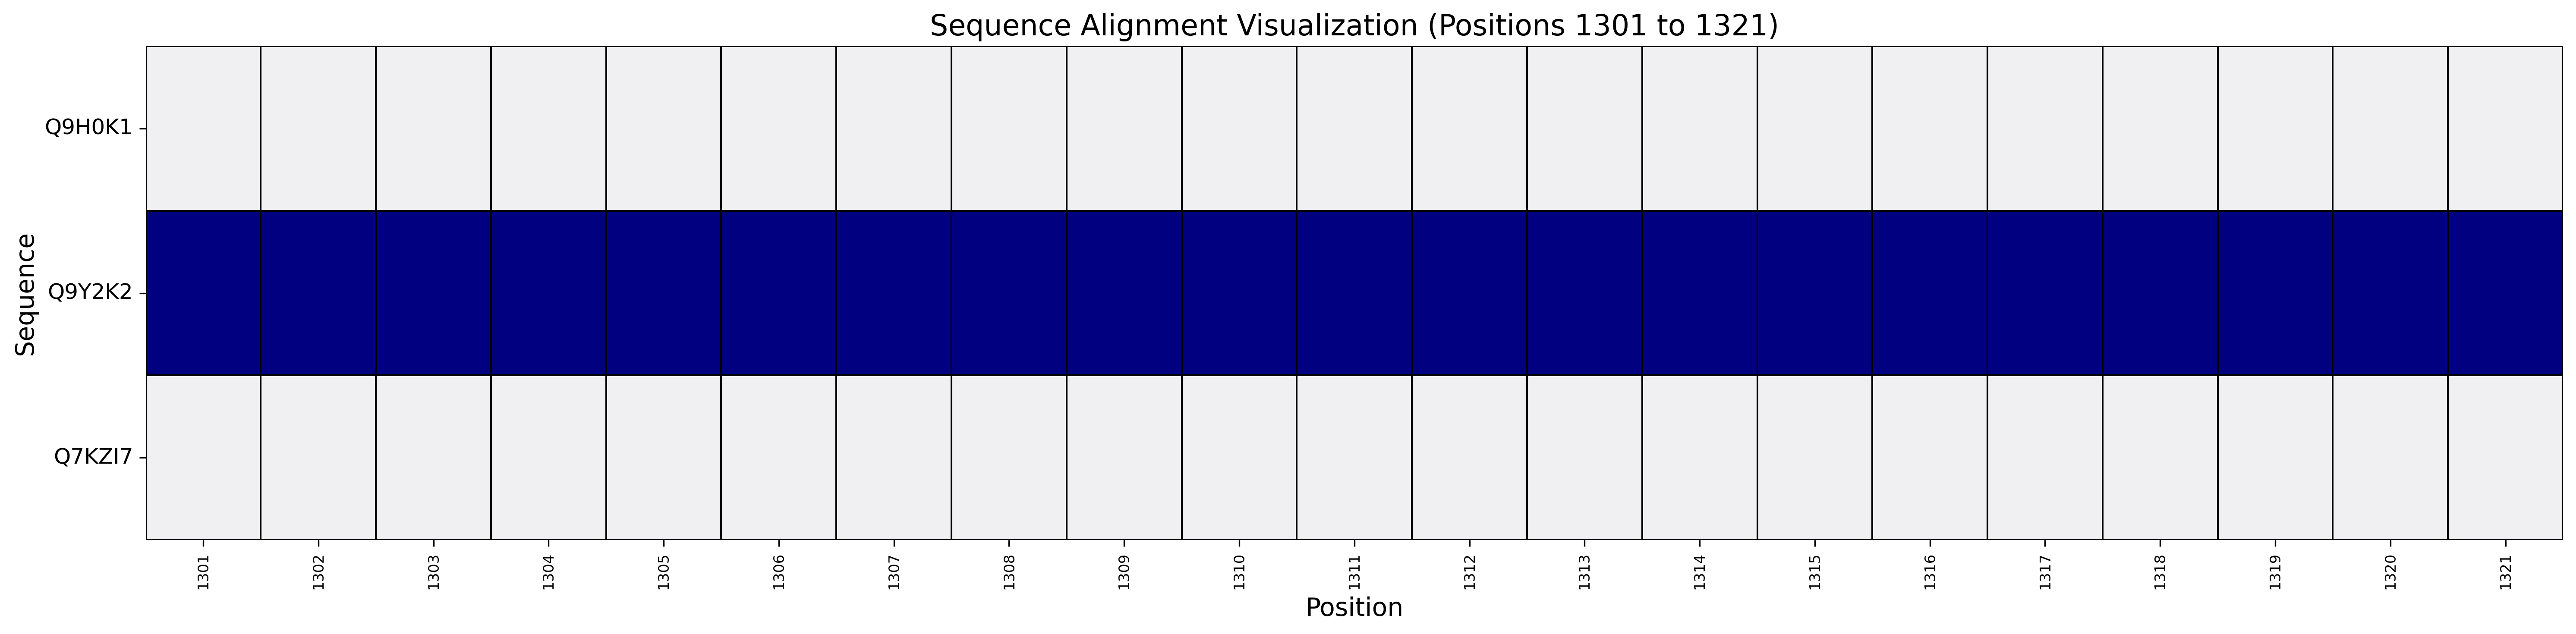

In [ ]:
from Bio import AlignIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Path to the alignment file
alignment_file = "Q7KZI7.aln"

# Read the alignment result
alignment = AlignIO.read(alignment_file, "clustal")

# Function to convert alignment to a 2D numpy array
def alignment_to_array(alignment, start=0, end=None):
    alignment_length = alignment.get_alignment_length()
    if end is None:
        end = alignment_length
    sequences = [str(record.seq[start:end]) for record in alignment]
    array = np.array([list(seq) for seq in sequences])
    return array, end - start

def plot_alignment_segment(alignment, start, end):
    align_array, align_length = alignment_to_array(alignment, start, end)
    cmap = sns.light_palette("navy", as_cmap=True)

    fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
    sns.heatmap((align_array != '-').astype(int), cmap=cmap, cbar=False, ax=ax, linewidths=.5, linecolor='black')

    ax.set_yticks(np.arange(align_array.shape[0]) + 0.5)
    ax.set_yticklabels([record.id for record in alignment], rotation=0, fontsize=12)
    ax.set_xticks(np.arange(align_length) + 0.5)
    ax.set_xticklabels(np.arange(start + 1, end + 1), rotation=90, fontsize=8)

    plt.title(f"Sequence Alignment Visualization (Positions {start+1} to {end})", fontsize=16)
    plt.xlabel("Position", fontsize=14)
    plt.ylabel("Sequence", fontsize=14)
    plt.tight_layout()

    plt.show()

# Specify the range of positions to visualize
segment_size = 100  # Adjust the size of each segment
total_length = alignment.get_alignment_length()

# Loop through the alignment in segments and visualize each segment
for start in range(0, total_length, segment_size):
    end = min(start + segment_size, total_length)
    plot_alignment_segment(alignment, start, end)


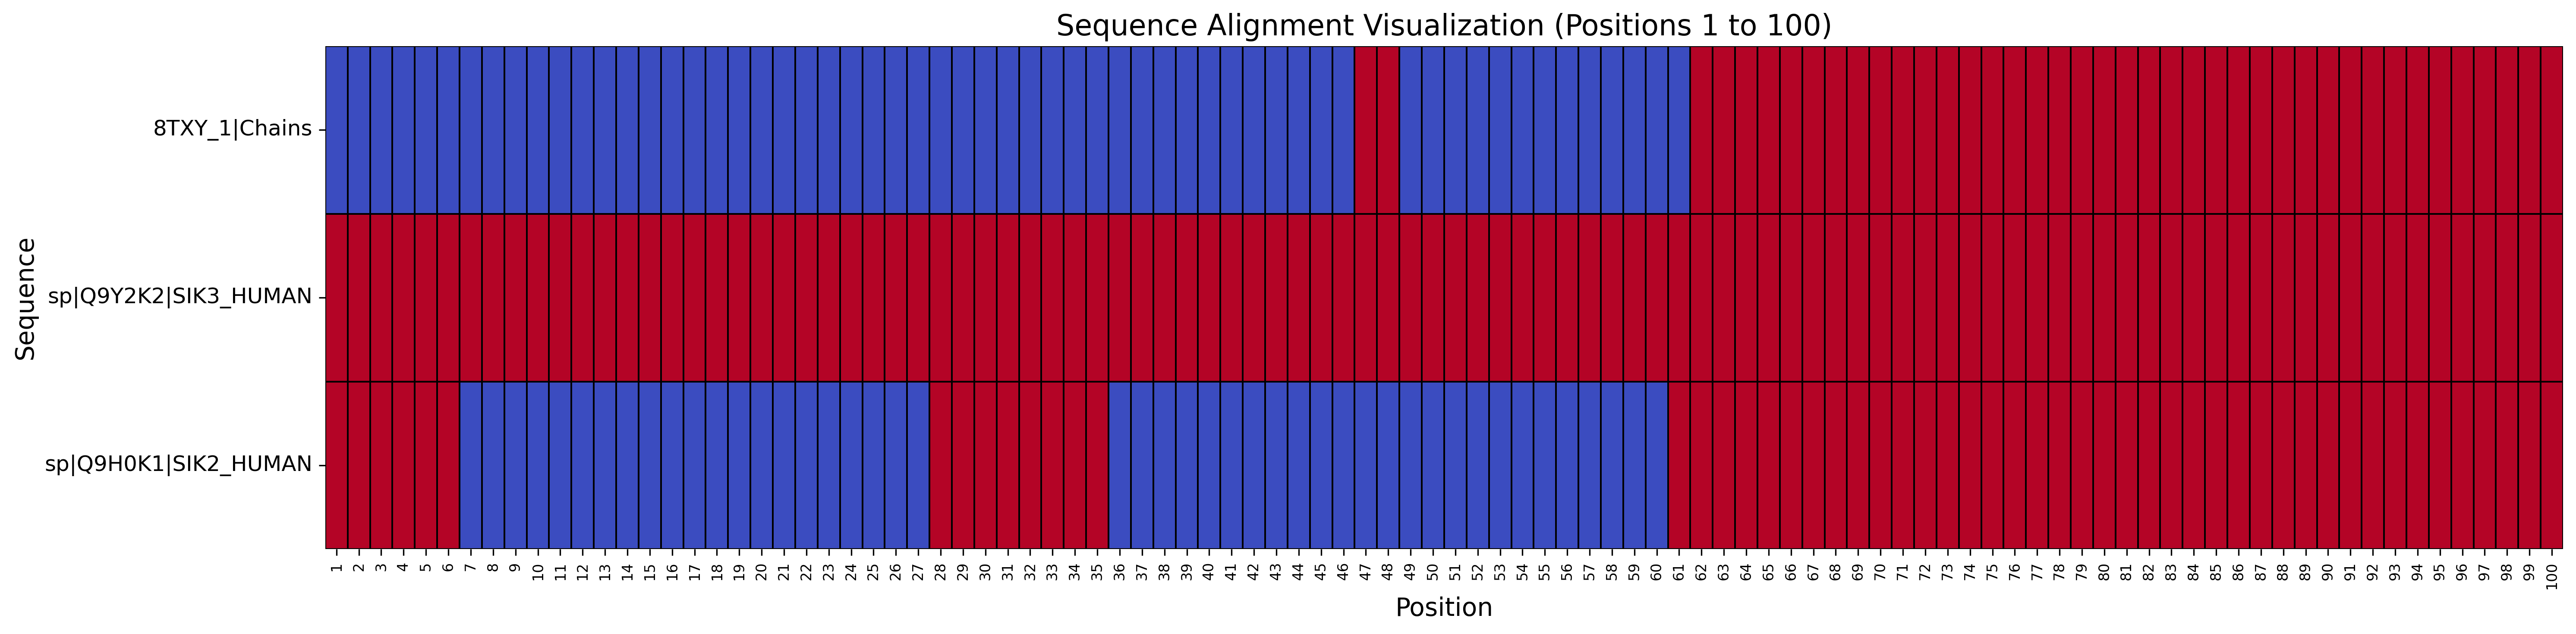

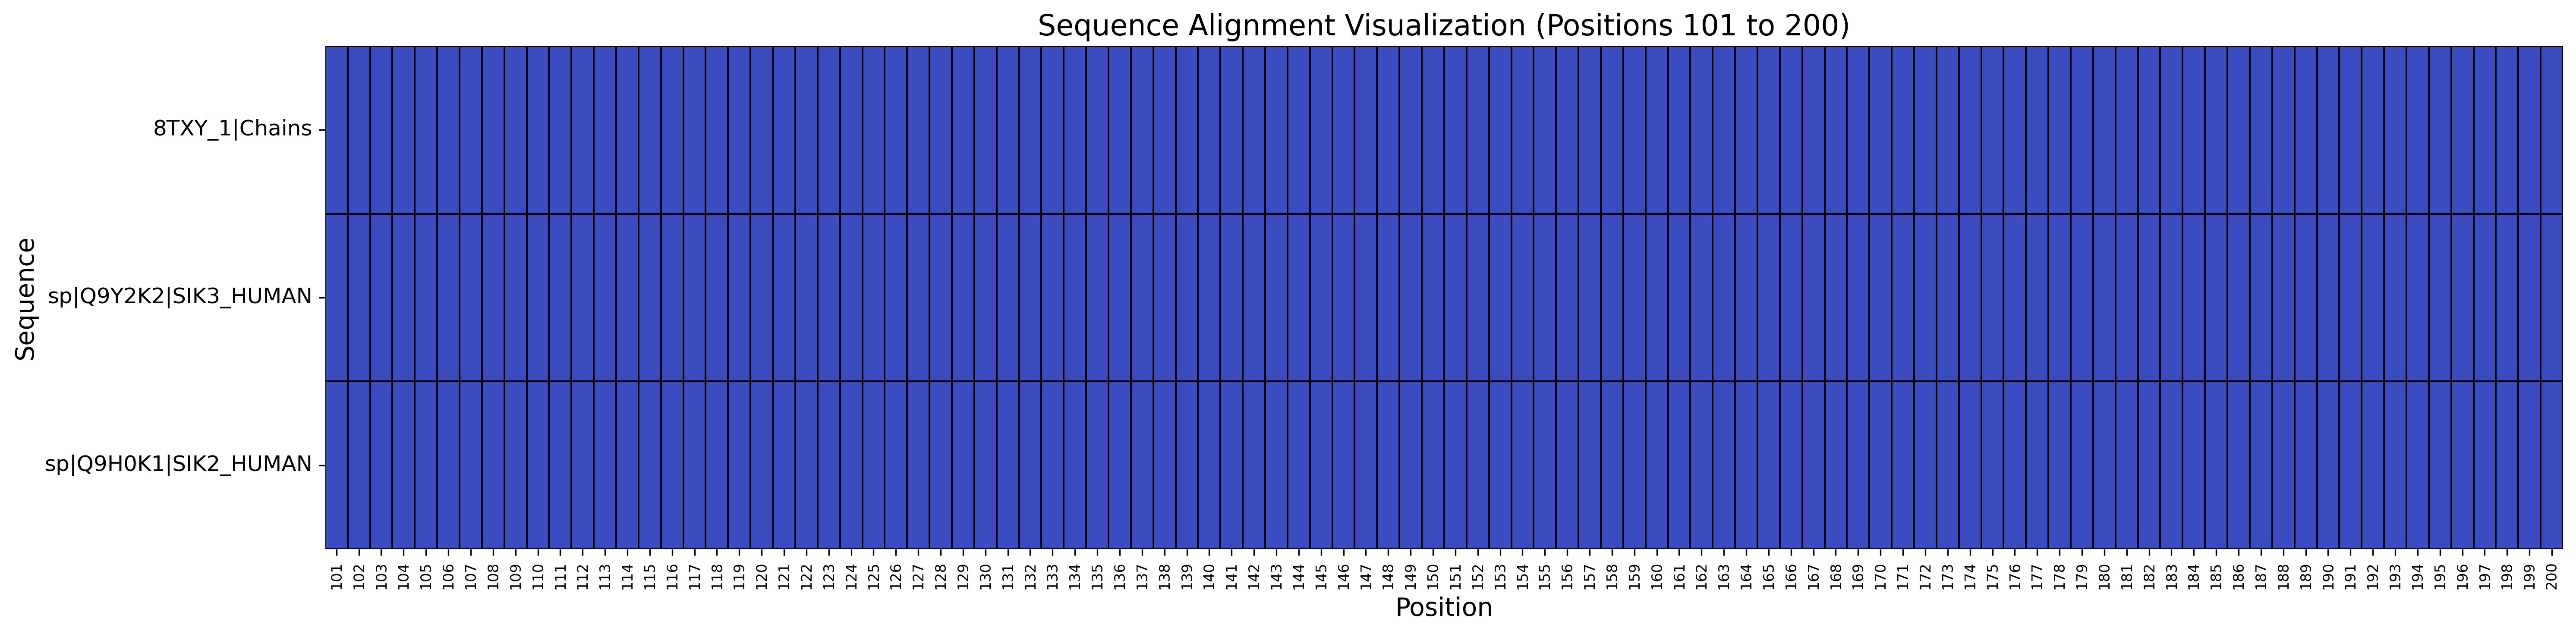

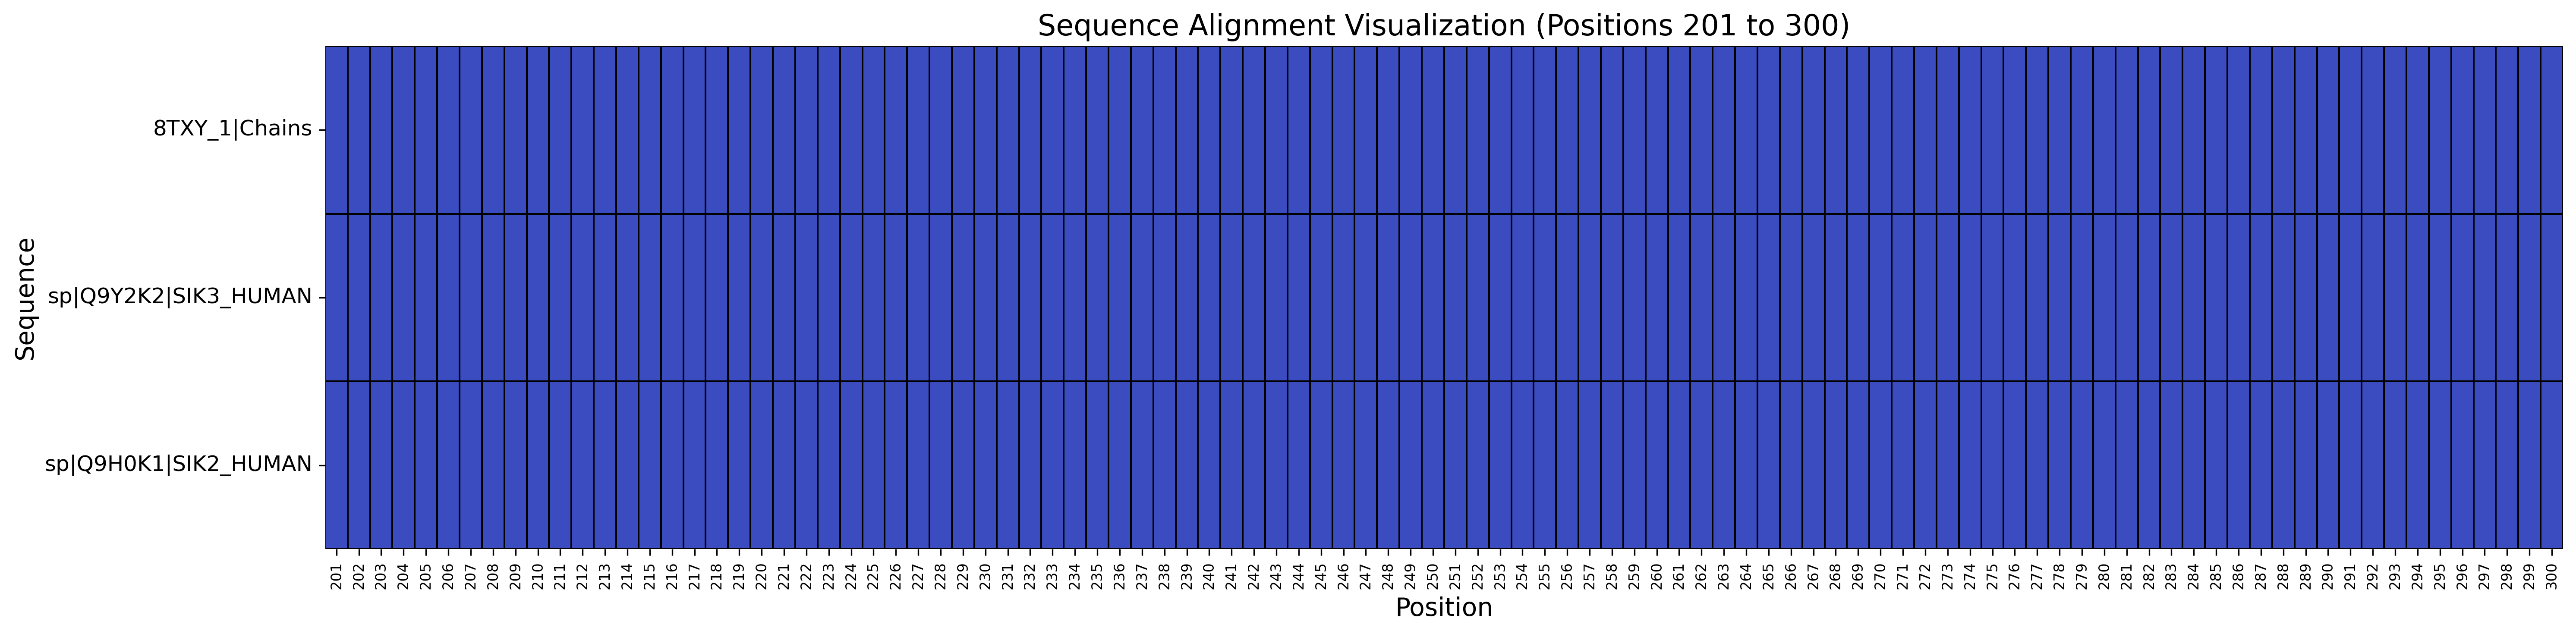

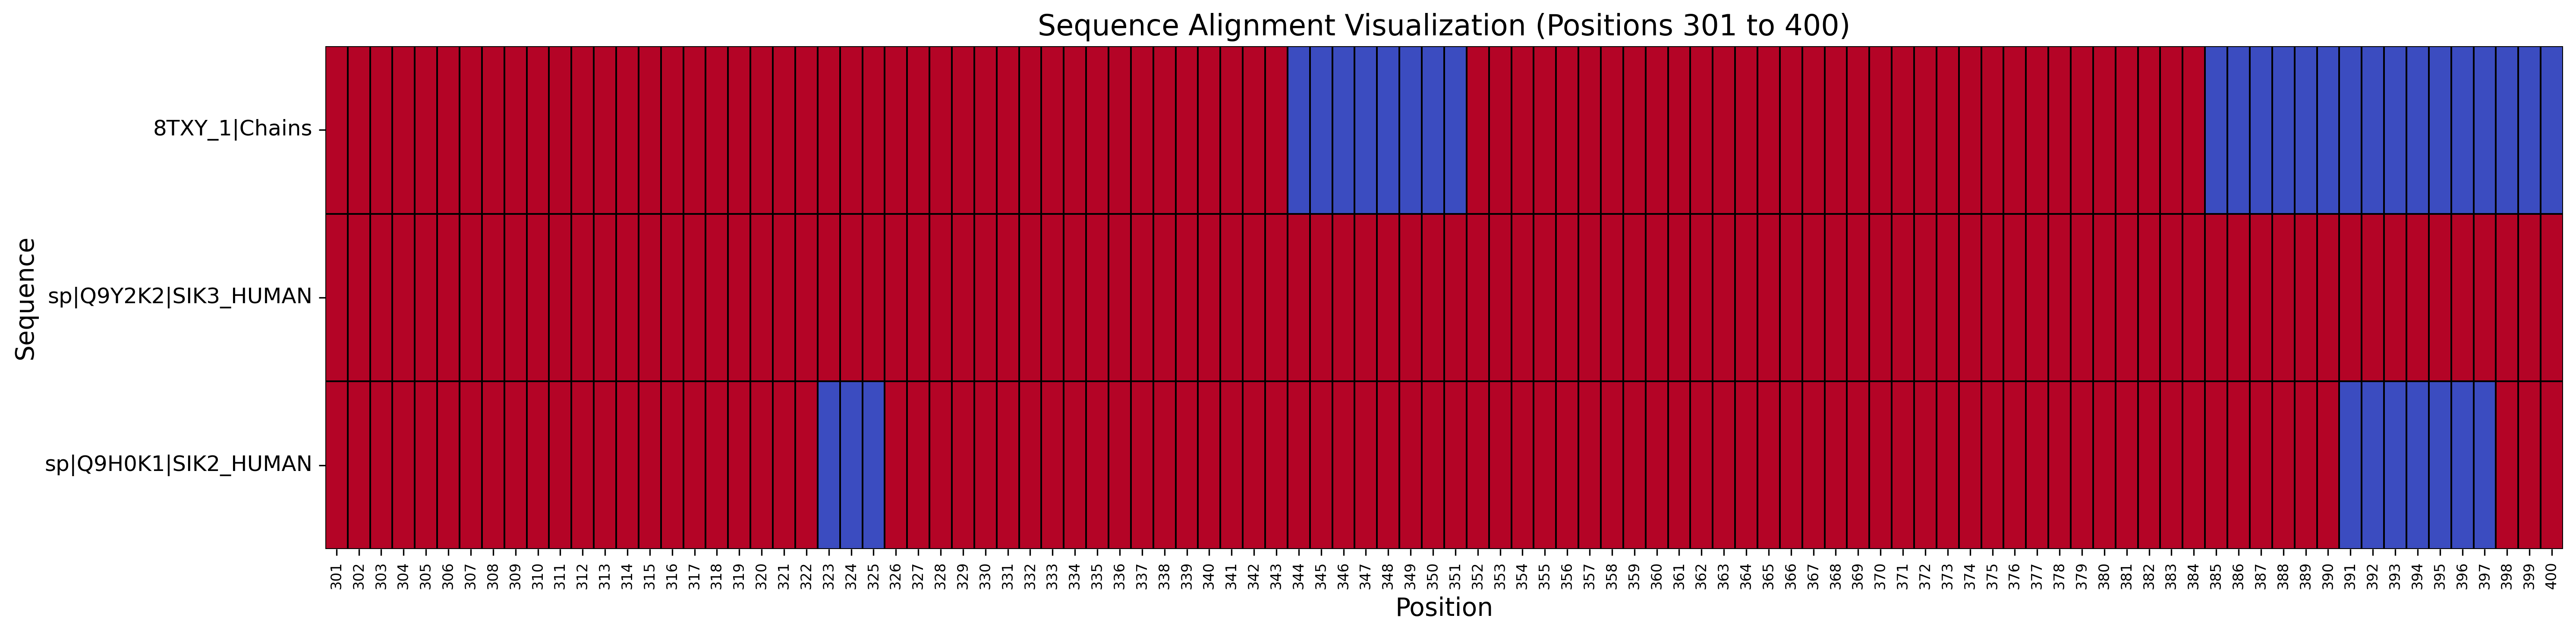

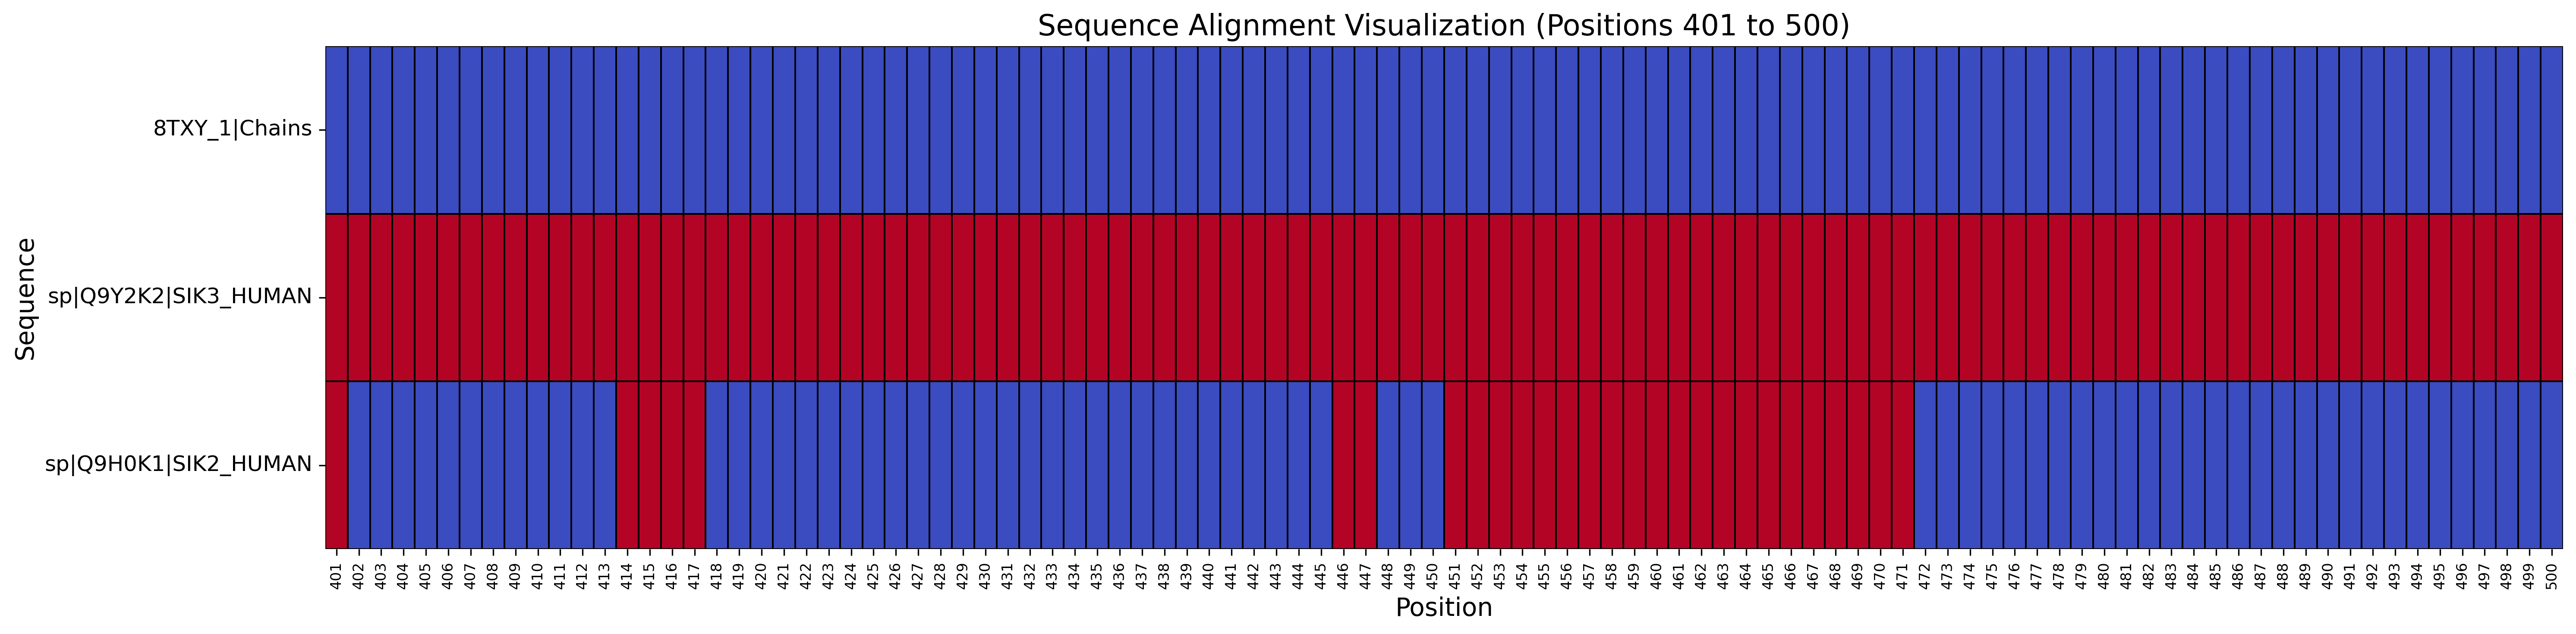

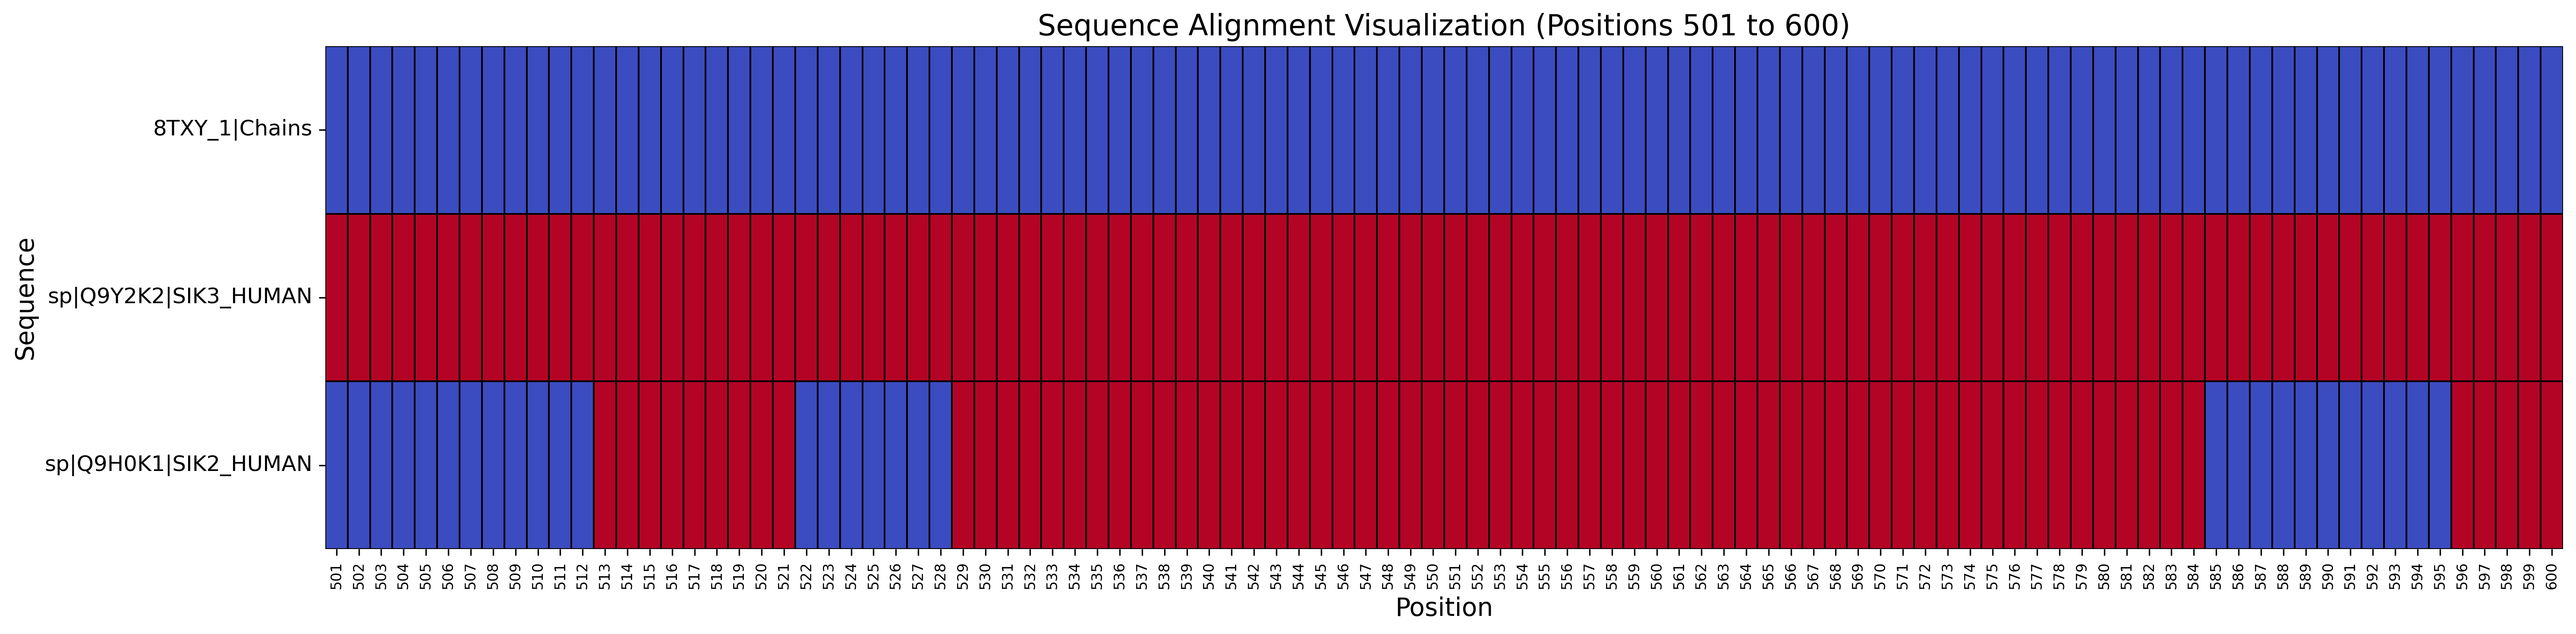

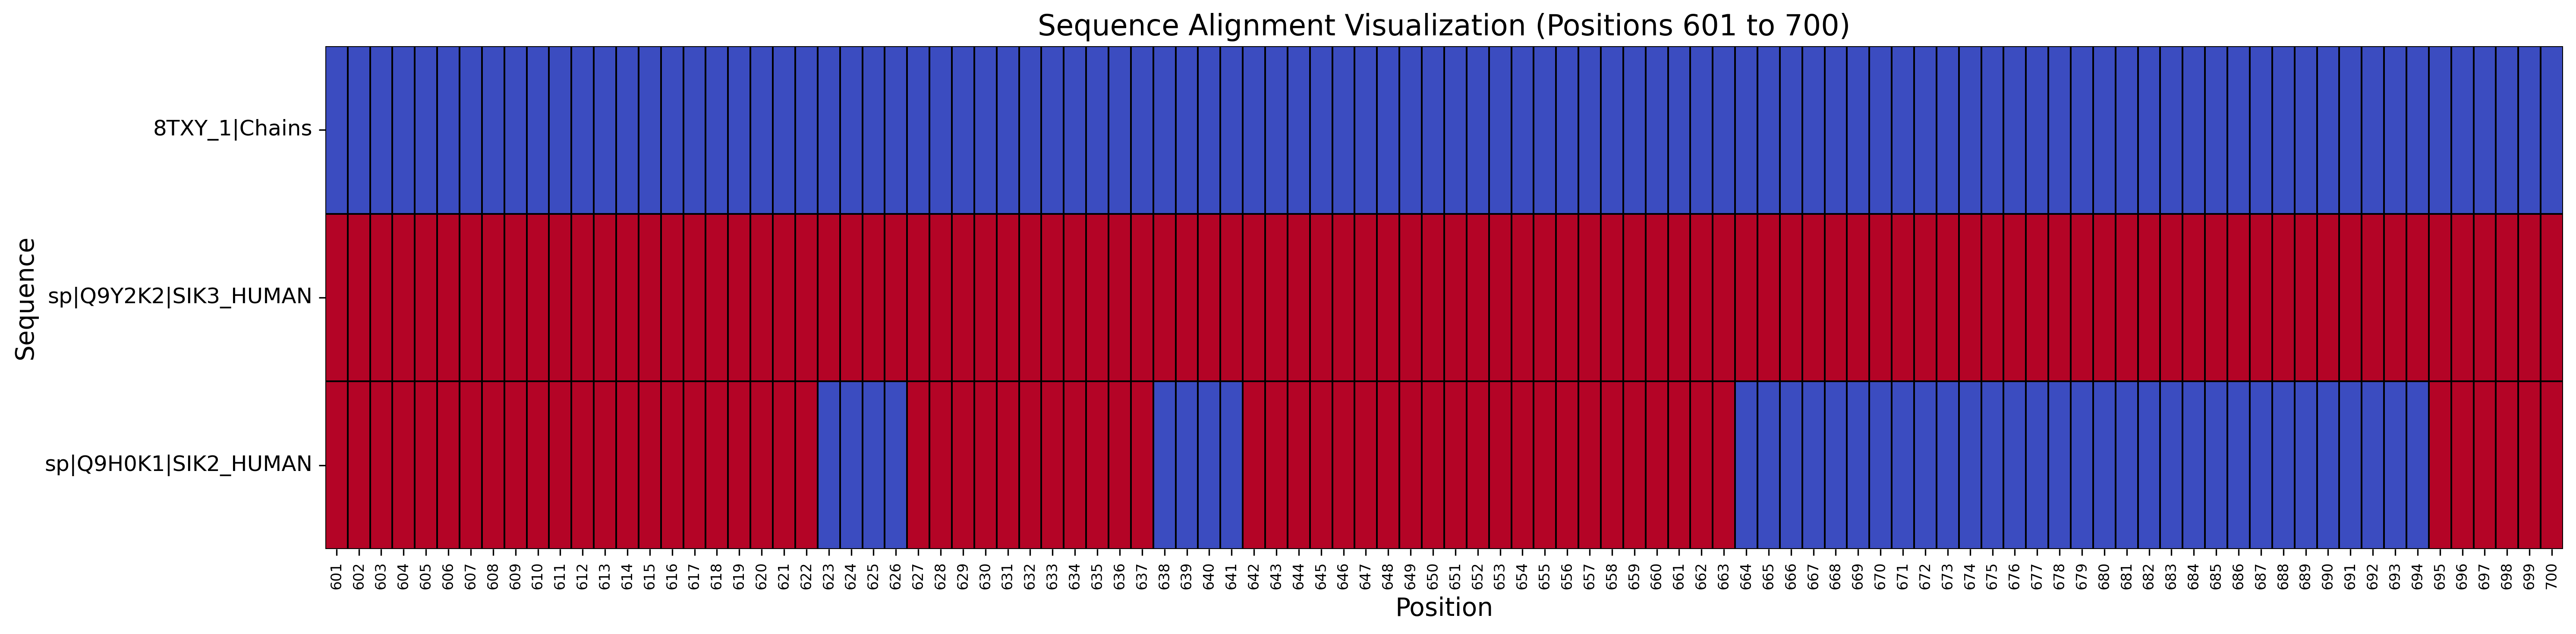

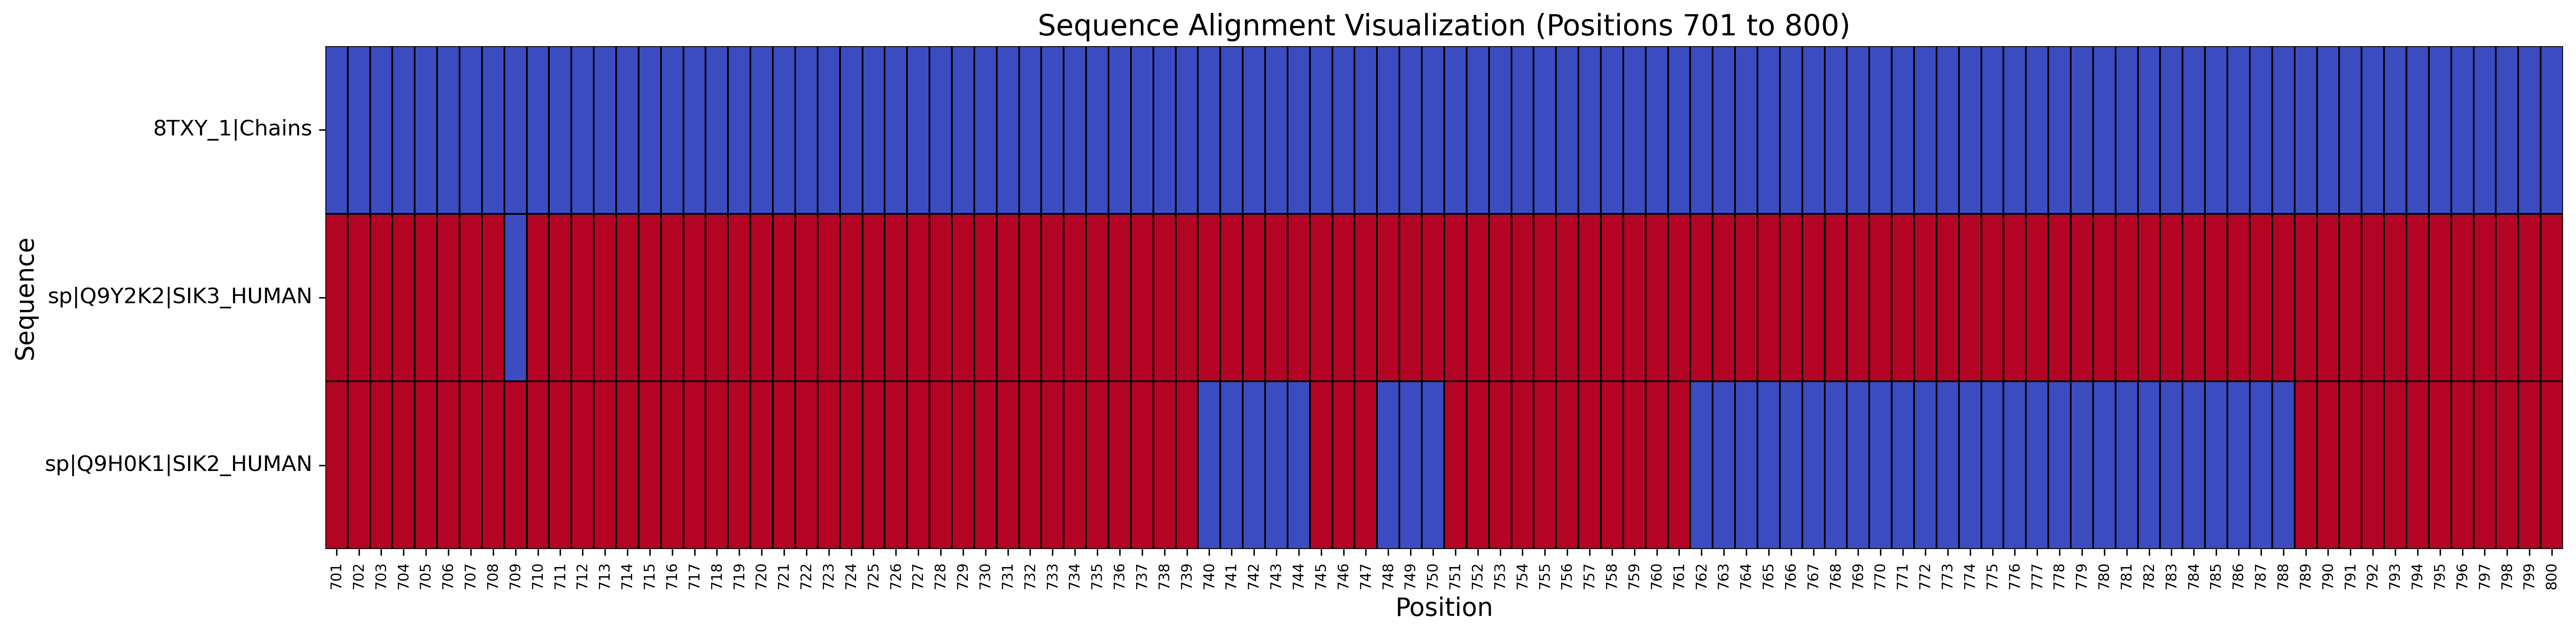

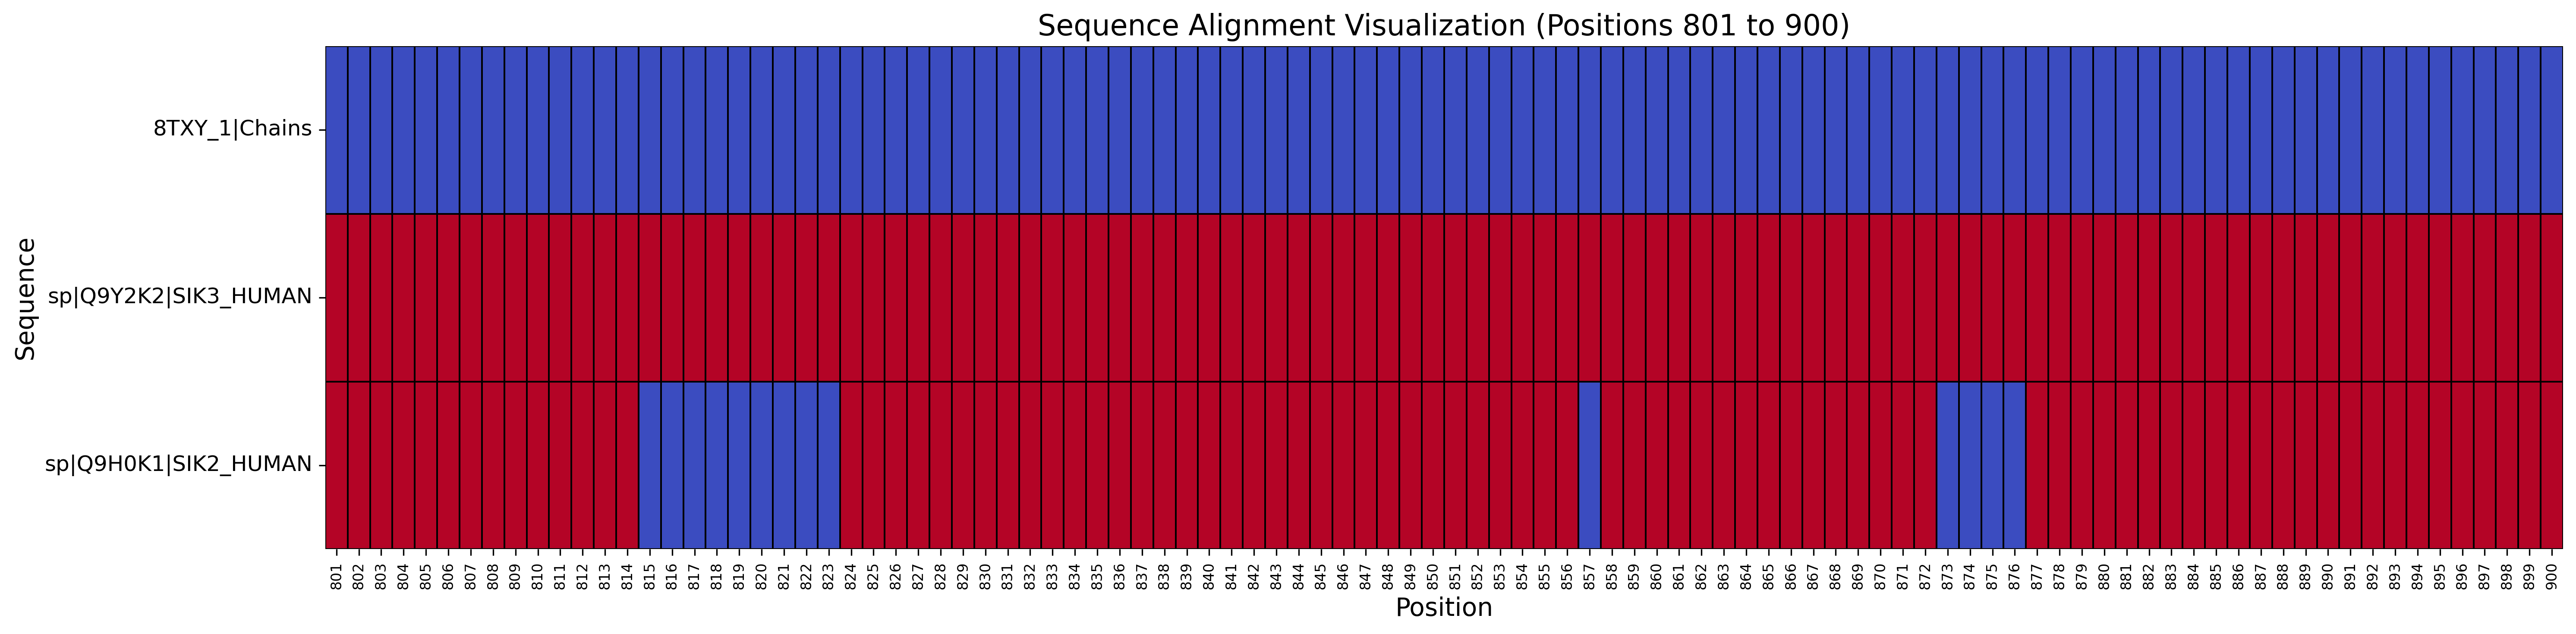

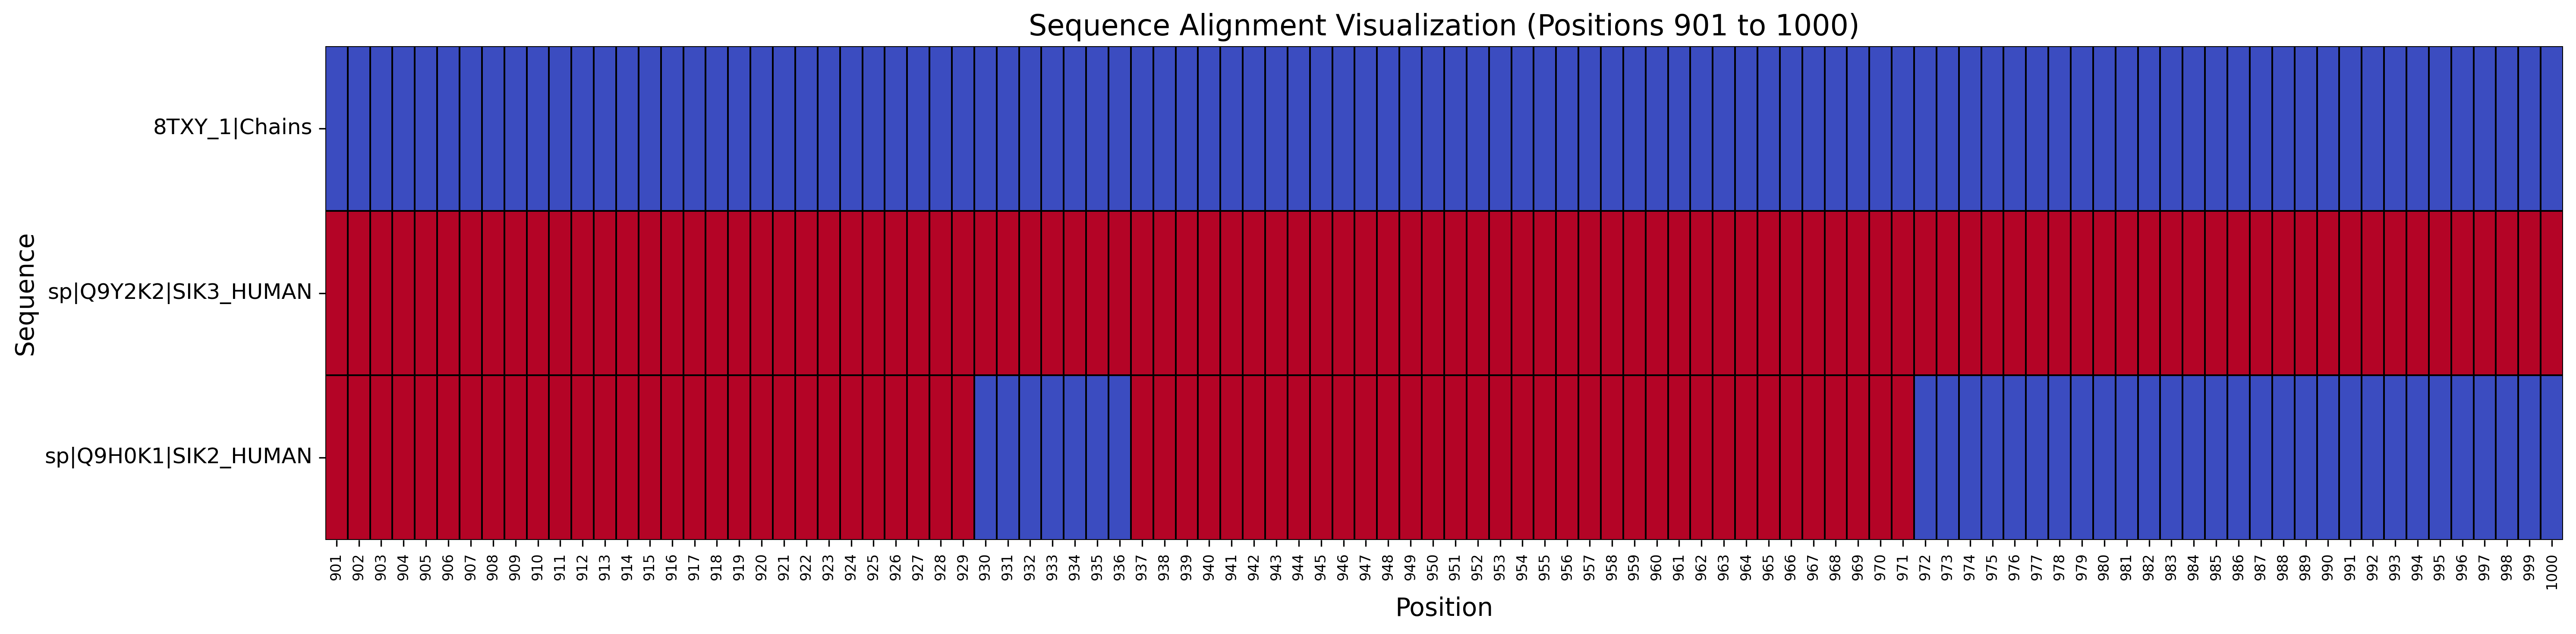

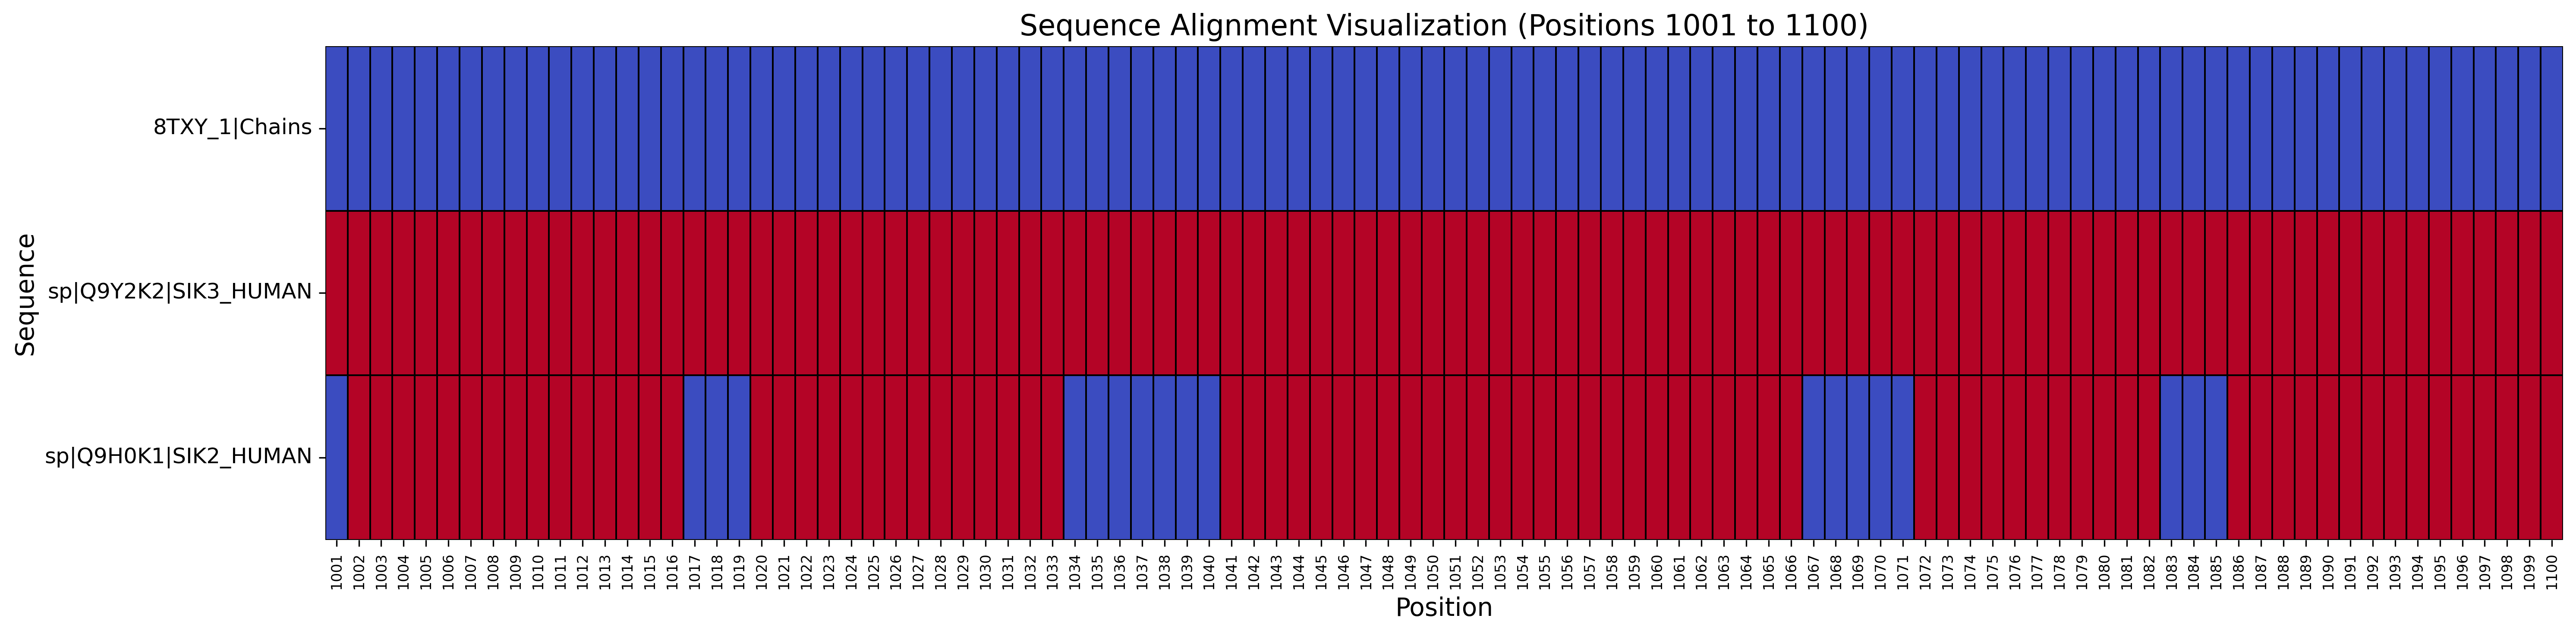

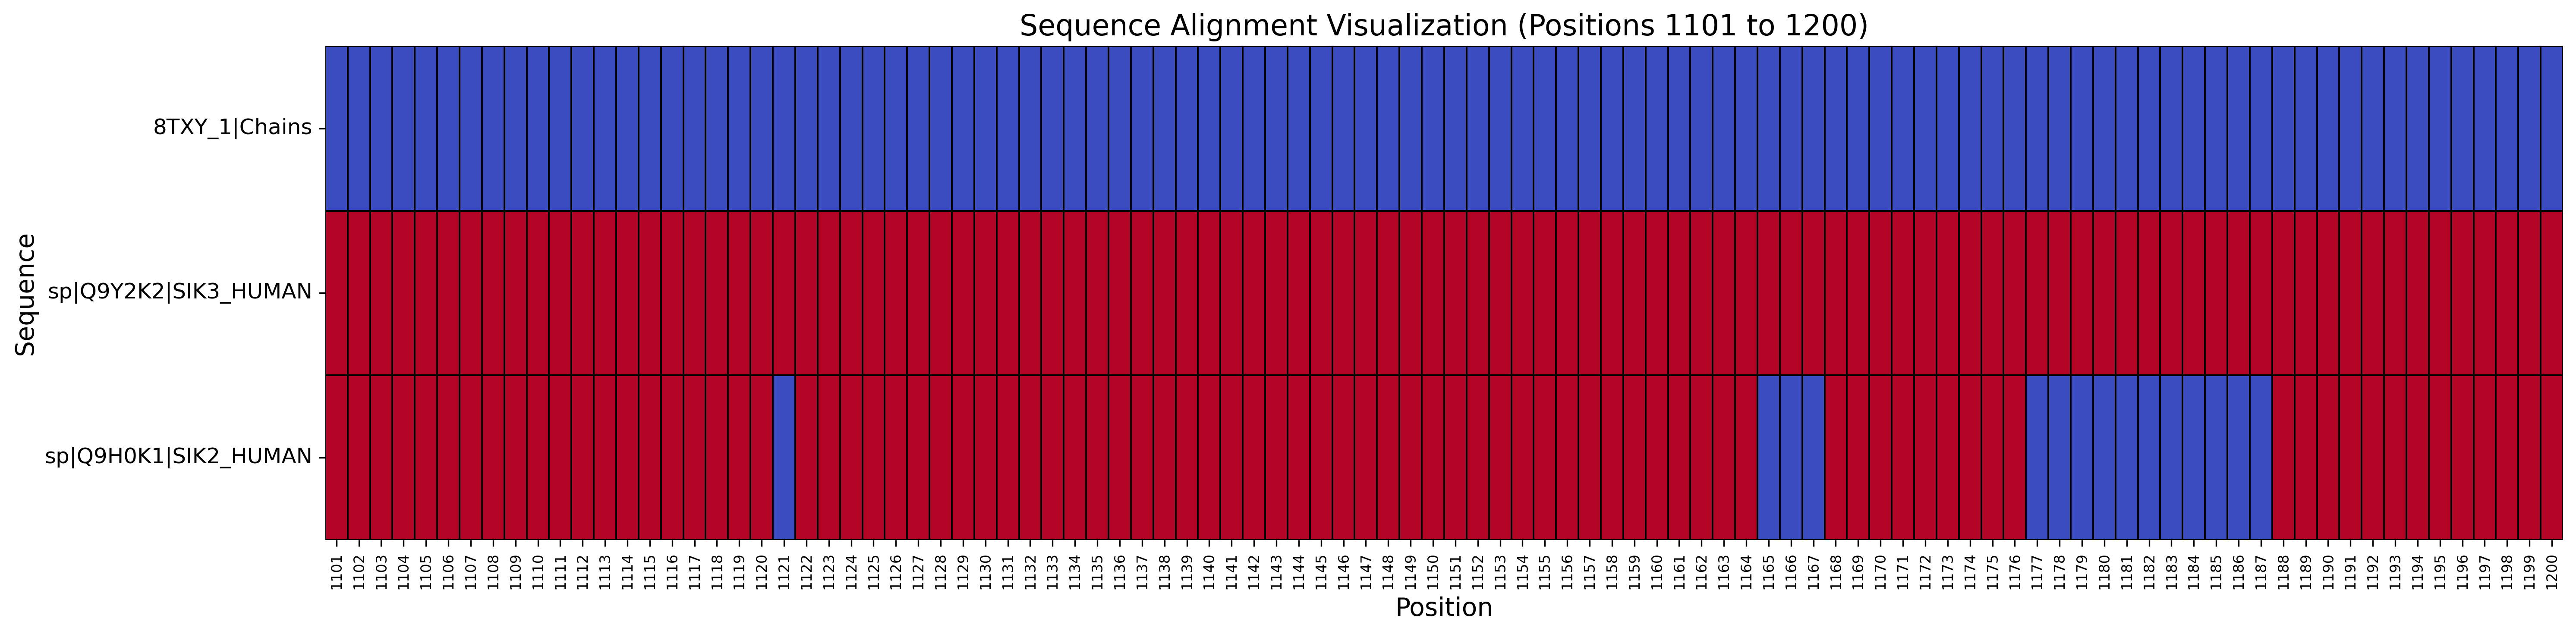

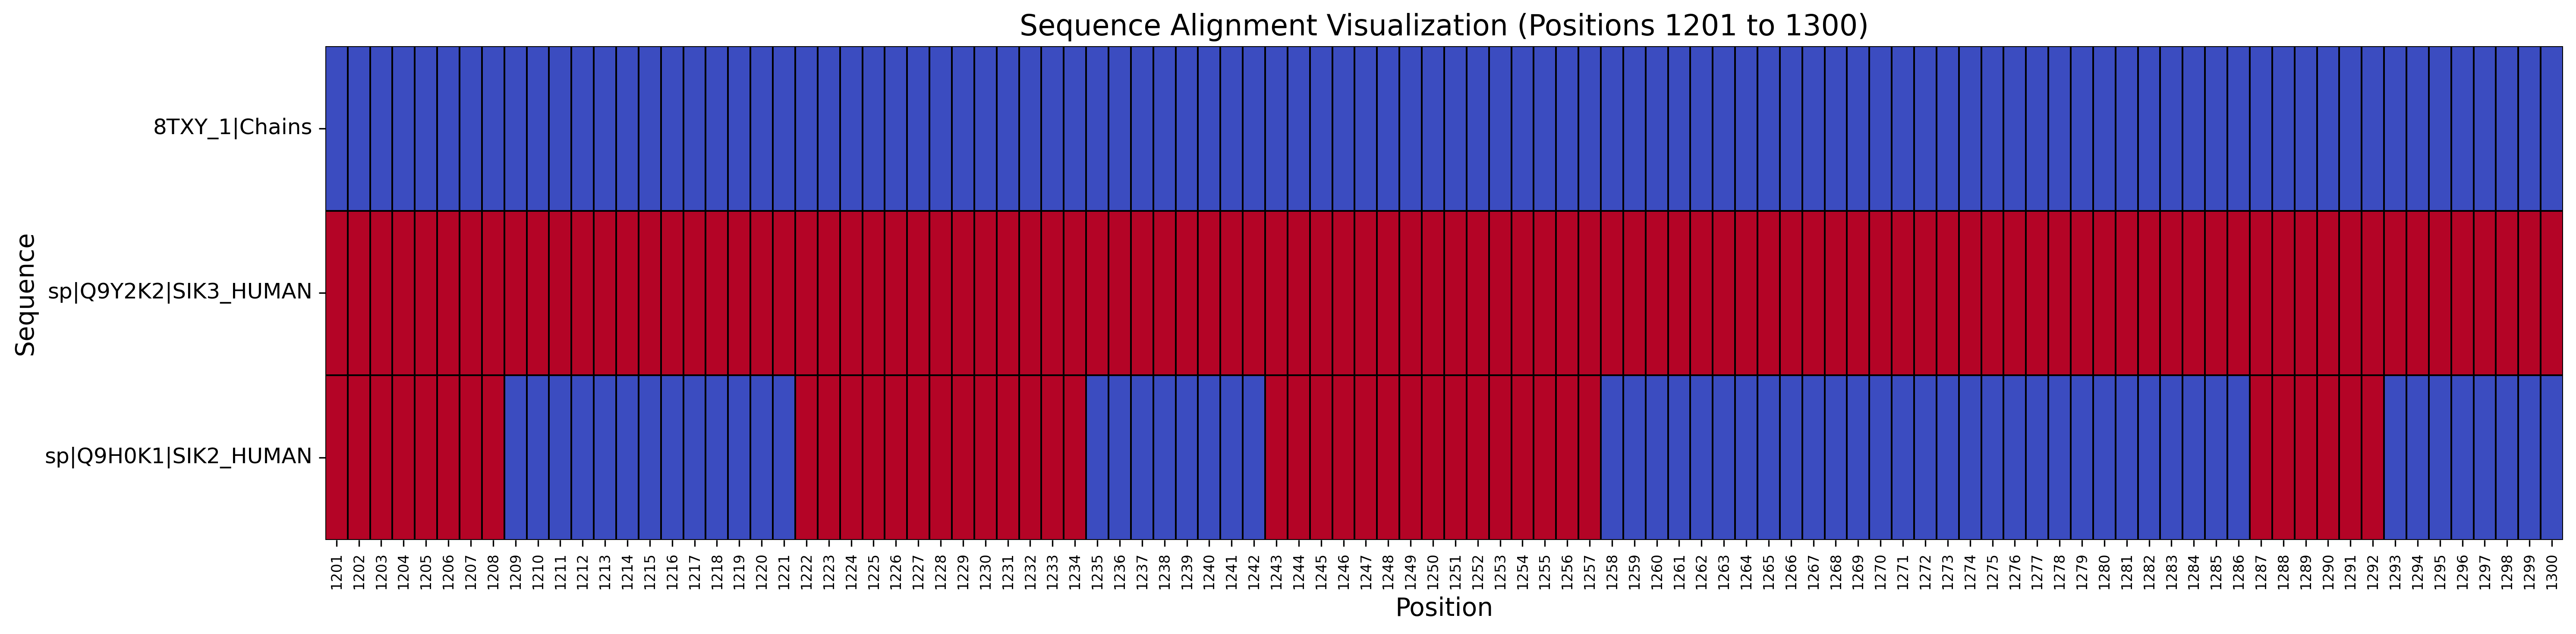

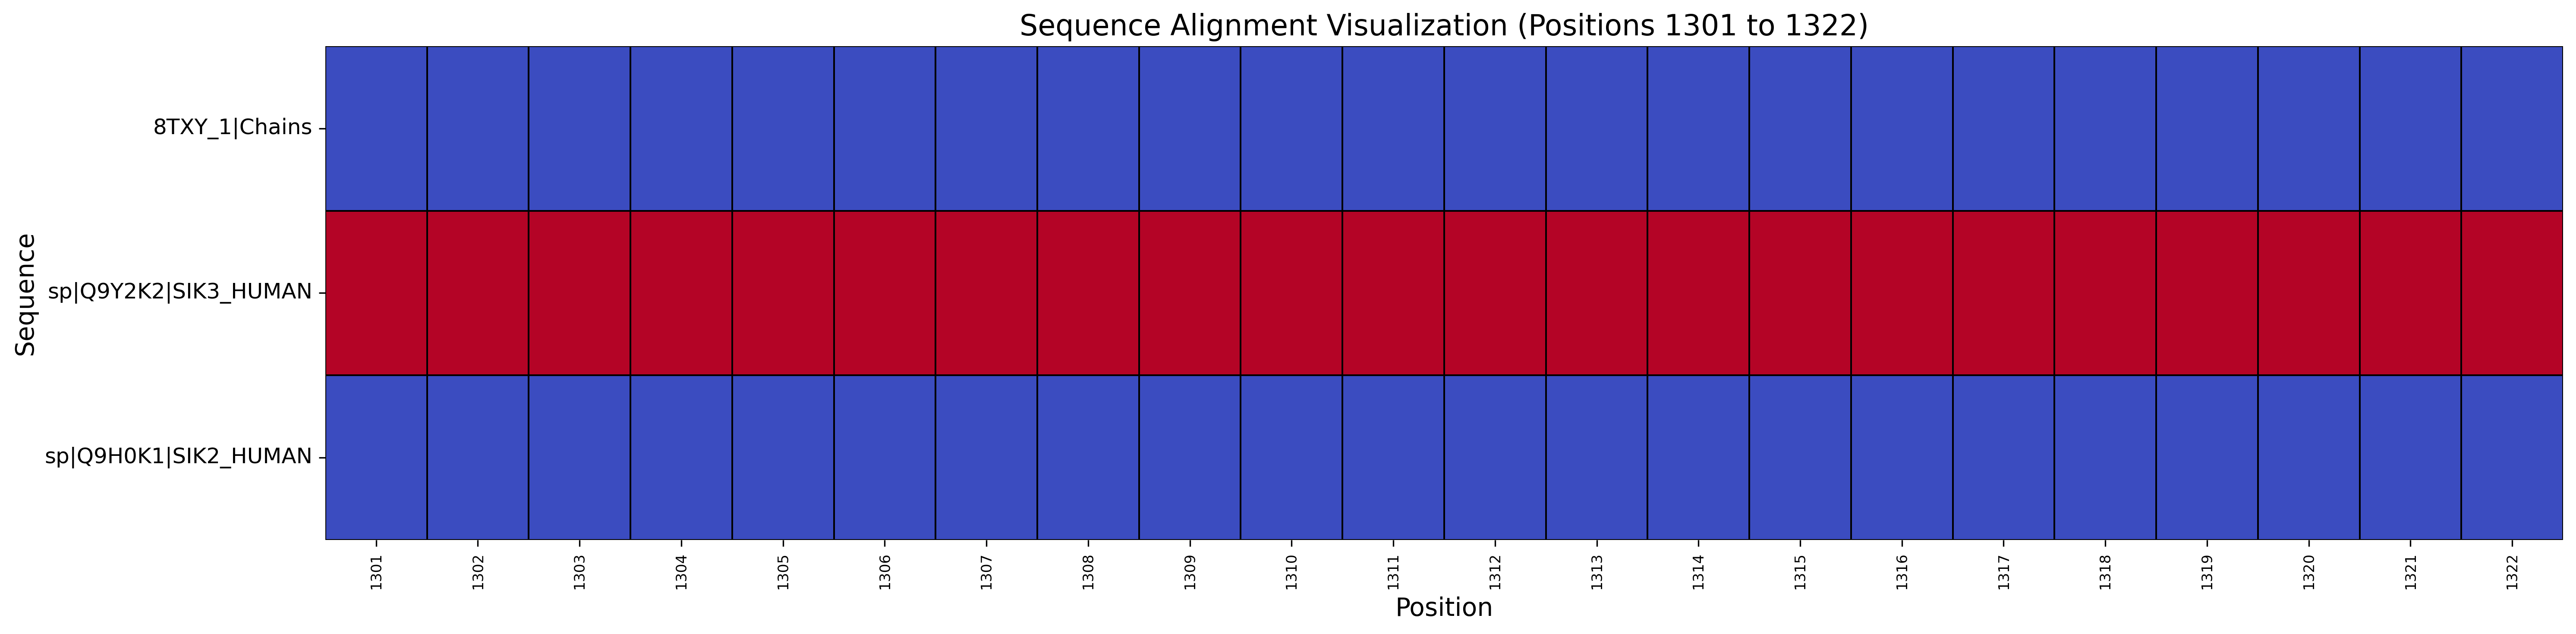

In [ ]:
from Bio import AlignIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Path to the alignment file
alignment_file = "rcsb_pdb_8TXY.aln"

# Read the alignment result
alignment = AlignIO.read(alignment_file, "clustal")

# Function to convert alignment to a 2D numpy array
def alignment_to_array(alignment, start=0, end=None):
    alignment_length = alignment.get_alignment_length()
    if end is None:
        end = alignment_length
    sequences = [str(record.seq[start:end]) for record in alignment]
    array = np.array([list(seq) for seq in sequences])
    return array, end - start

def plot_alignment_segment(alignment, start, end):
    align_array, align_length = alignment_to_array(alignment, start, end)

    # Custom colormap for alignment visualization
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
    sns.heatmap((align_array != '-').astype(int), cmap=cmap, cbar=False, ax=ax, linewidths=.5, linecolor='black')

    ax.set_yticks(np.arange(align_array.shape[0]) + 0.5)
    ax.set_yticklabels([record.id for record in alignment], rotation=0, fontsize=12)
    ax.set_xticks(np.arange(align_length) + 0.5)
    ax.set_xticklabels(np.arange(start + 1, end + 1), rotation=90, fontsize=8)

    plt.title(f"Sequence Alignment Visualization (Positions {start+1} to {end})", fontsize=16)
    plt.xlabel("Position", fontsize=14)
    plt.ylabel("Sequence", fontsize=14)
    plt.tight_layout()

    plt.show()

# Specify the range of positions to visualize
segment_size = 100  # Adjust the size of each segment
total_length = alignment.get_alignment_length()

# Loop through the alignment in segments and visualize each segment
for start in range(0, total_length, segment_size):
    end = min(start + segment_size, total_length)
    plot_alignment_segment(alignment, start, end)


Segment 101-200: Score 83.66666666666667


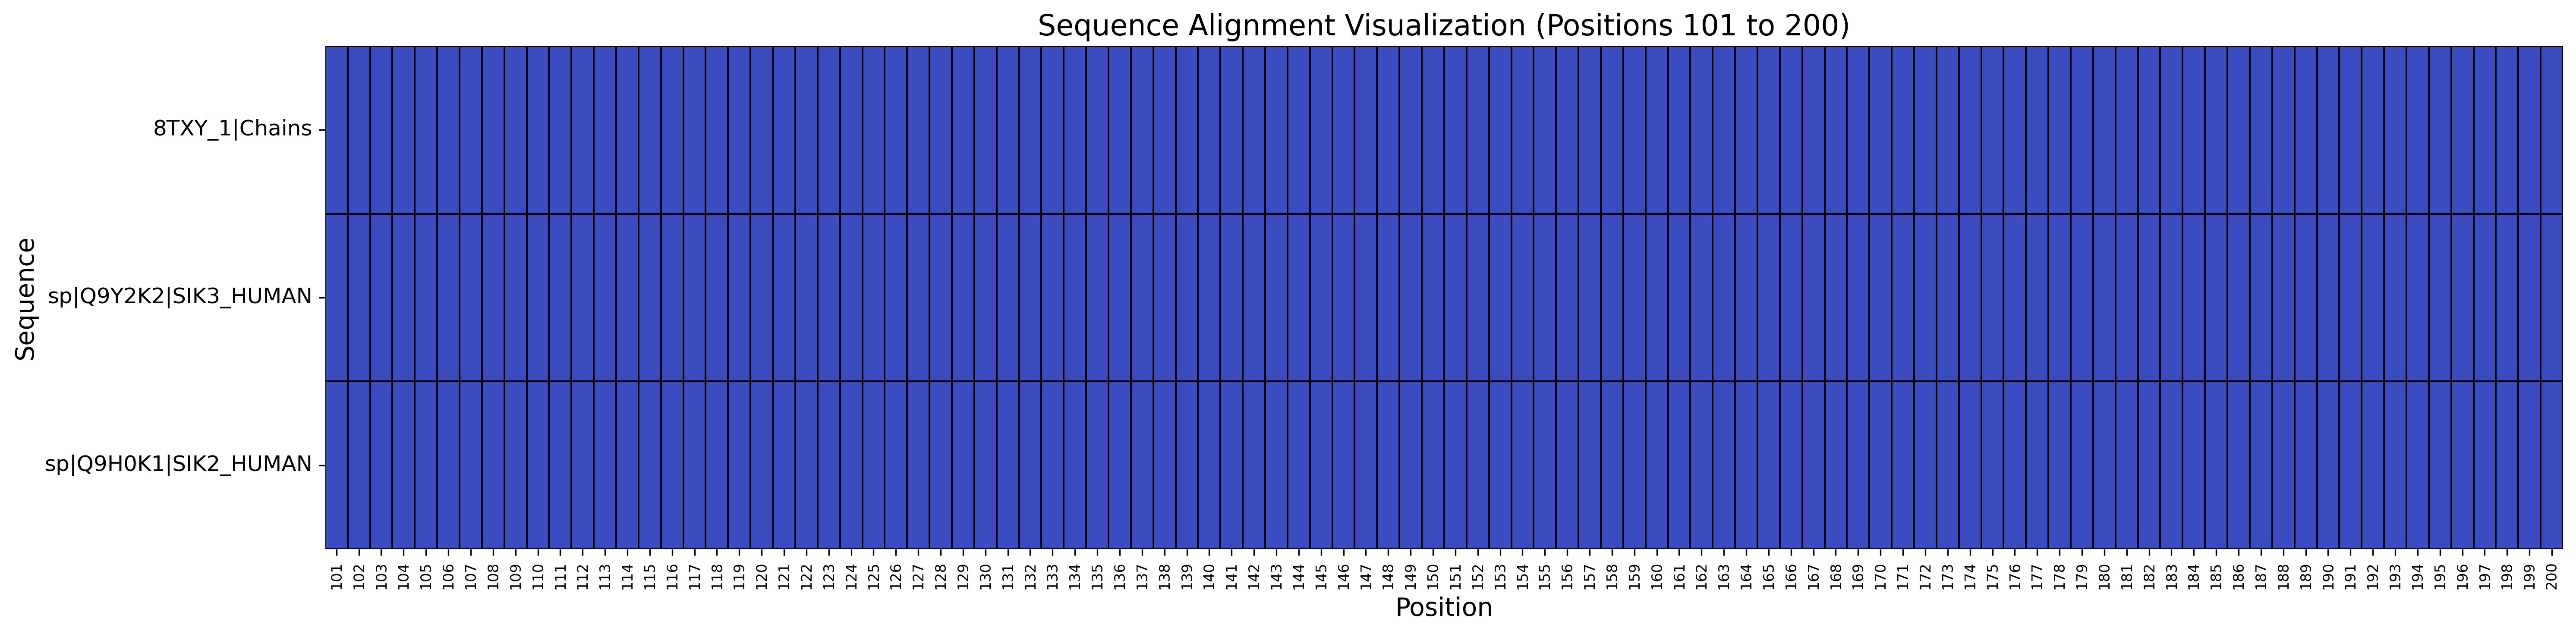

Segment 201-300: Score 83.00000000000001


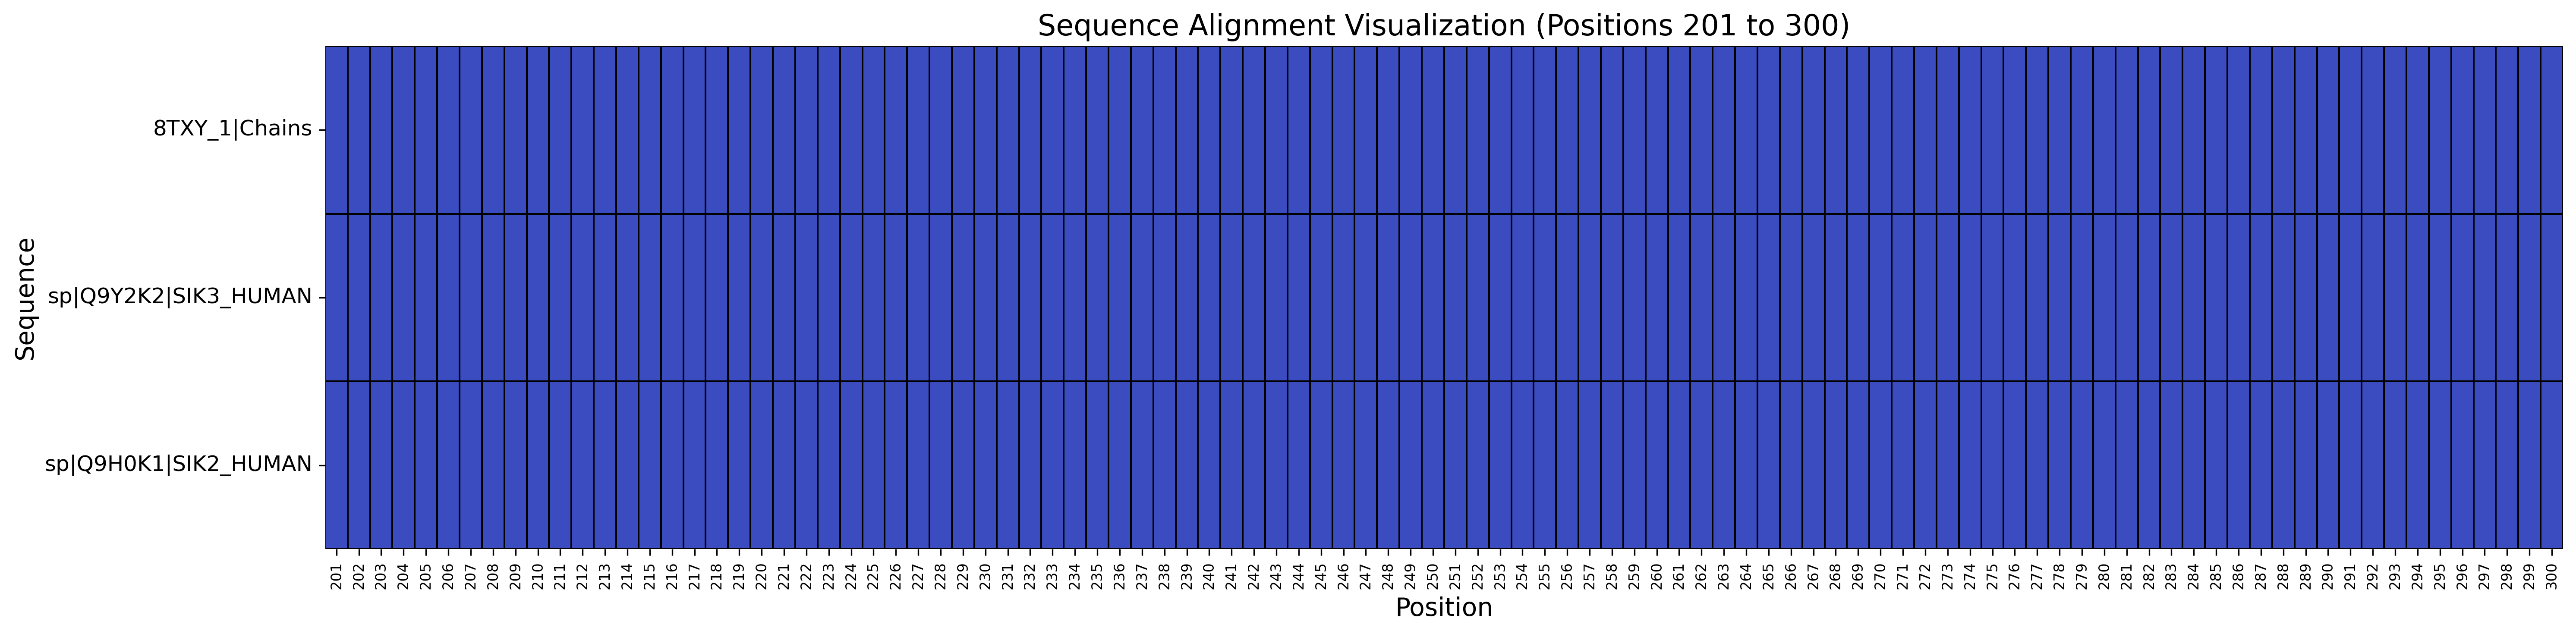

Segment 1-100: Score 68.0


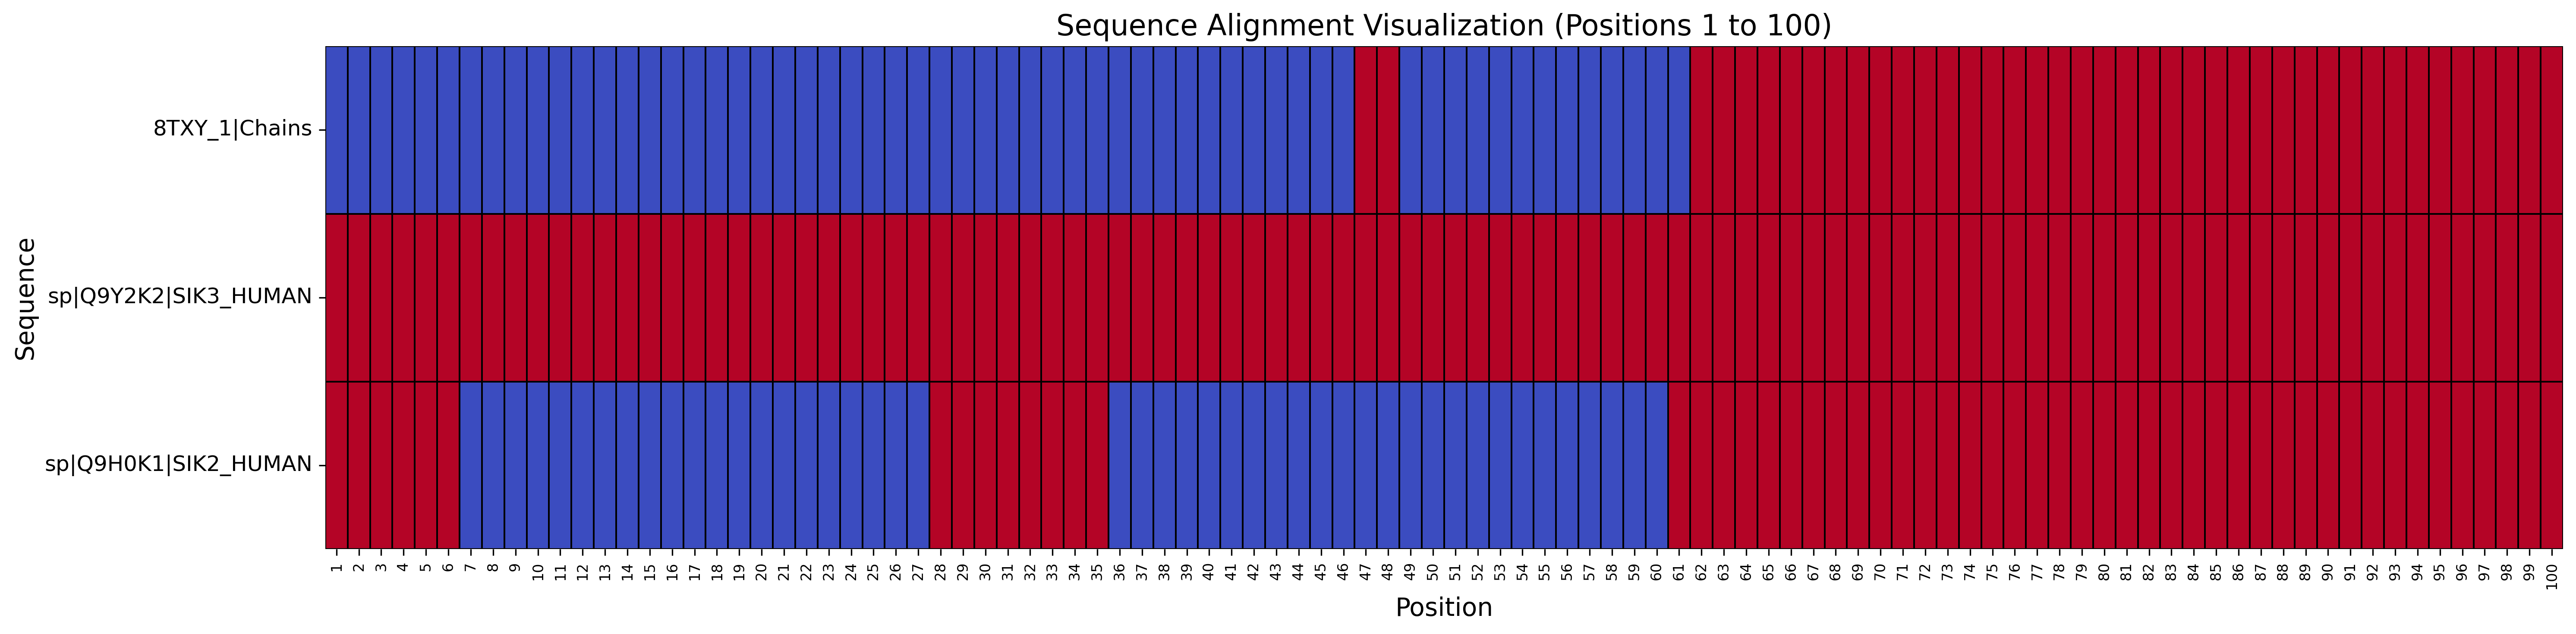

Segment 401-500: Score 60.66666666666666


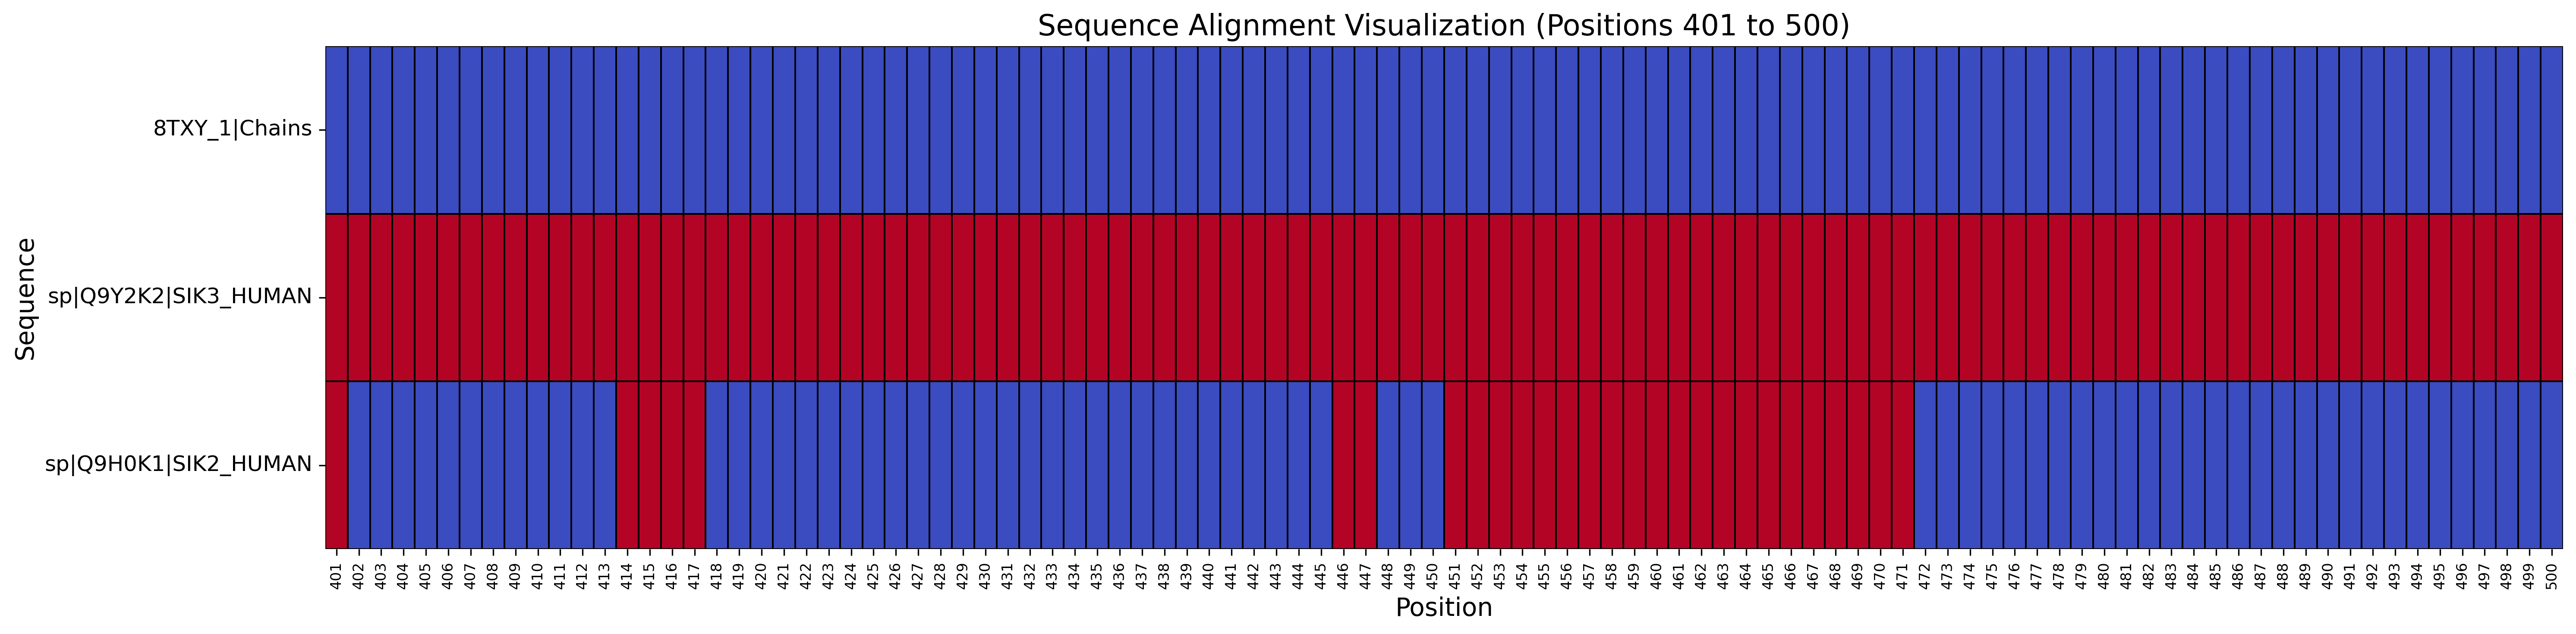

Segment 1201-1300: Score 57.66666666666666


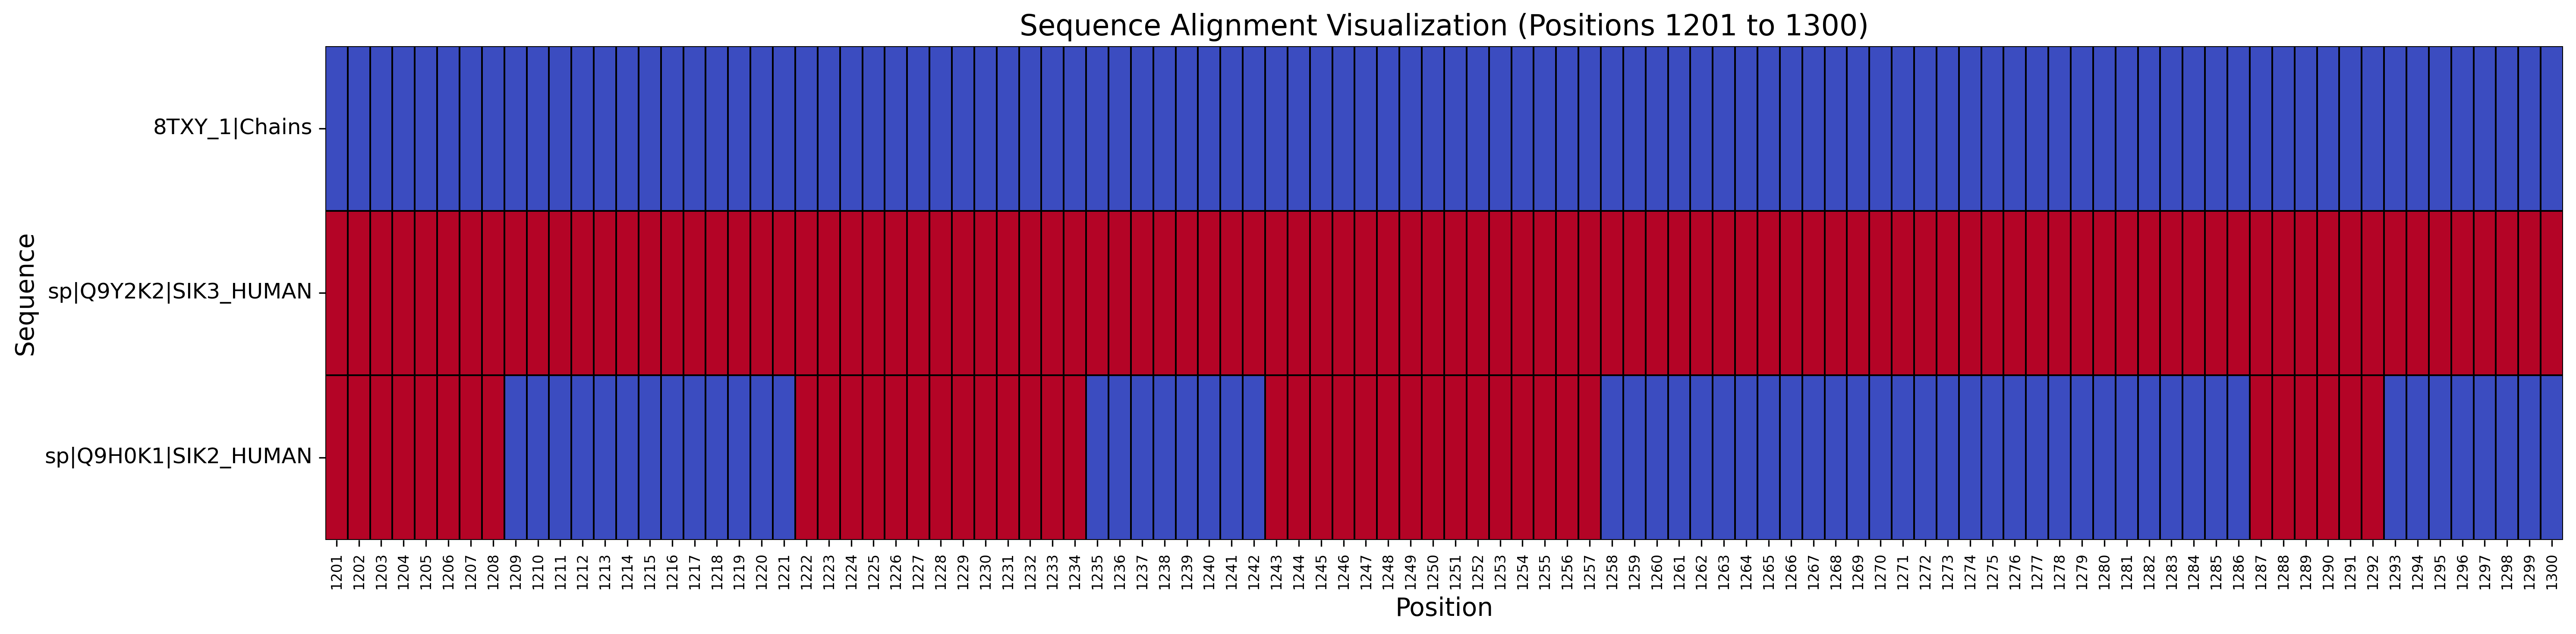

In [ ]:
from Bio import AlignIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Path to the alignment file
alignment_file = "rcsb_pdb_8TXY.aln"

# Read the alignment result
alignment = AlignIO.read(alignment_file, "clustal")

# Function to convert alignment to a 2D numpy array
def alignment_to_array(alignment, start=0, end=None):
    alignment_length = alignment.get_alignment_length()
    if end is None:
        end = alignment_length
    sequences = [str(record.seq[start:end]) for record in alignment]
    array = np.array([list(seq) for seq in sequences])
    return array, end - start

# Function to calculate conservation scores
def calculate_conservation(array):
    conservation = []
    for col in range(array.shape[1]):
        column = array[:, col]
        count = Counter(column)
        most_common = count.most_common(1)[0][1]
        score = most_common / len(column)
        conservation.append(score)
    return np.array(conservation)

# Function to plot alignment segment with conservation scores
def plot_alignment_segment(alignment, start, end, conservation_scores):
    align_array, align_length = alignment_to_array(alignment, start, end)

    # Custom colormap for alignment visualization
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
    sns.heatmap((align_array != '-').astype(int), cmap=cmap, cbar=False, ax=ax, linewidths=.5, linecolor='black')

    ax.set_yticks(np.arange(align_array.shape[0]) + 0.5)
    ax.set_yticklabels([record.id for record in alignment], rotation=0, fontsize=12)
    ax.set_xticks(np.arange(align_length) + 0.5)
    ax.set_xticklabels(np.arange(start + 1, end + 1), rotation=90, fontsize=8)

    for idx in range(align_length):
        ax.annotate(f"{conservation_scores[start + idx]:.2f}", xy=(idx + 0.5, -0.5),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='center', fontsize=8, color='black')

    plt.title(f"Sequence Alignment Visualization (Positions {start+1} to {end})", fontsize=16)
    plt.xlabel("Position", fontsize=14)
    plt.ylabel("Sequence", fontsize=14)
    plt.tight_layout()

    plt.show()

# Specify the range of positions to visualize
segment_size = 100  # Adjust the size of each segment
total_length = alignment.get_alignment_length()

# Calculate conservation scores for the entire alignment
alignment_array, _ = alignment_to_array(alignment)
conservation_scores = calculate_conservation(alignment_array)

# Loop through the alignment in segments, calculate scores, and visualize each segment
segment_scores = []
for start in range(0, total_length, segment_size):
    end = min(start + segment_size, total_length)
    segment_score = np.sum(conservation_scores[start:end])
    segment_scores.append((start, end, segment_score))

# Sort segments by score to identify the best aligned segments
segment_scores.sort(key=lambda x: x[2], reverse=True)

# Plot the best segments
for start, end, score in segment_scores[:5]:  # Plot top 5 segments
    print(f"Segment {start+1}-{end}: Score {score}")
    plot_alignment_segment(alignment, start, end, conservation_scores)


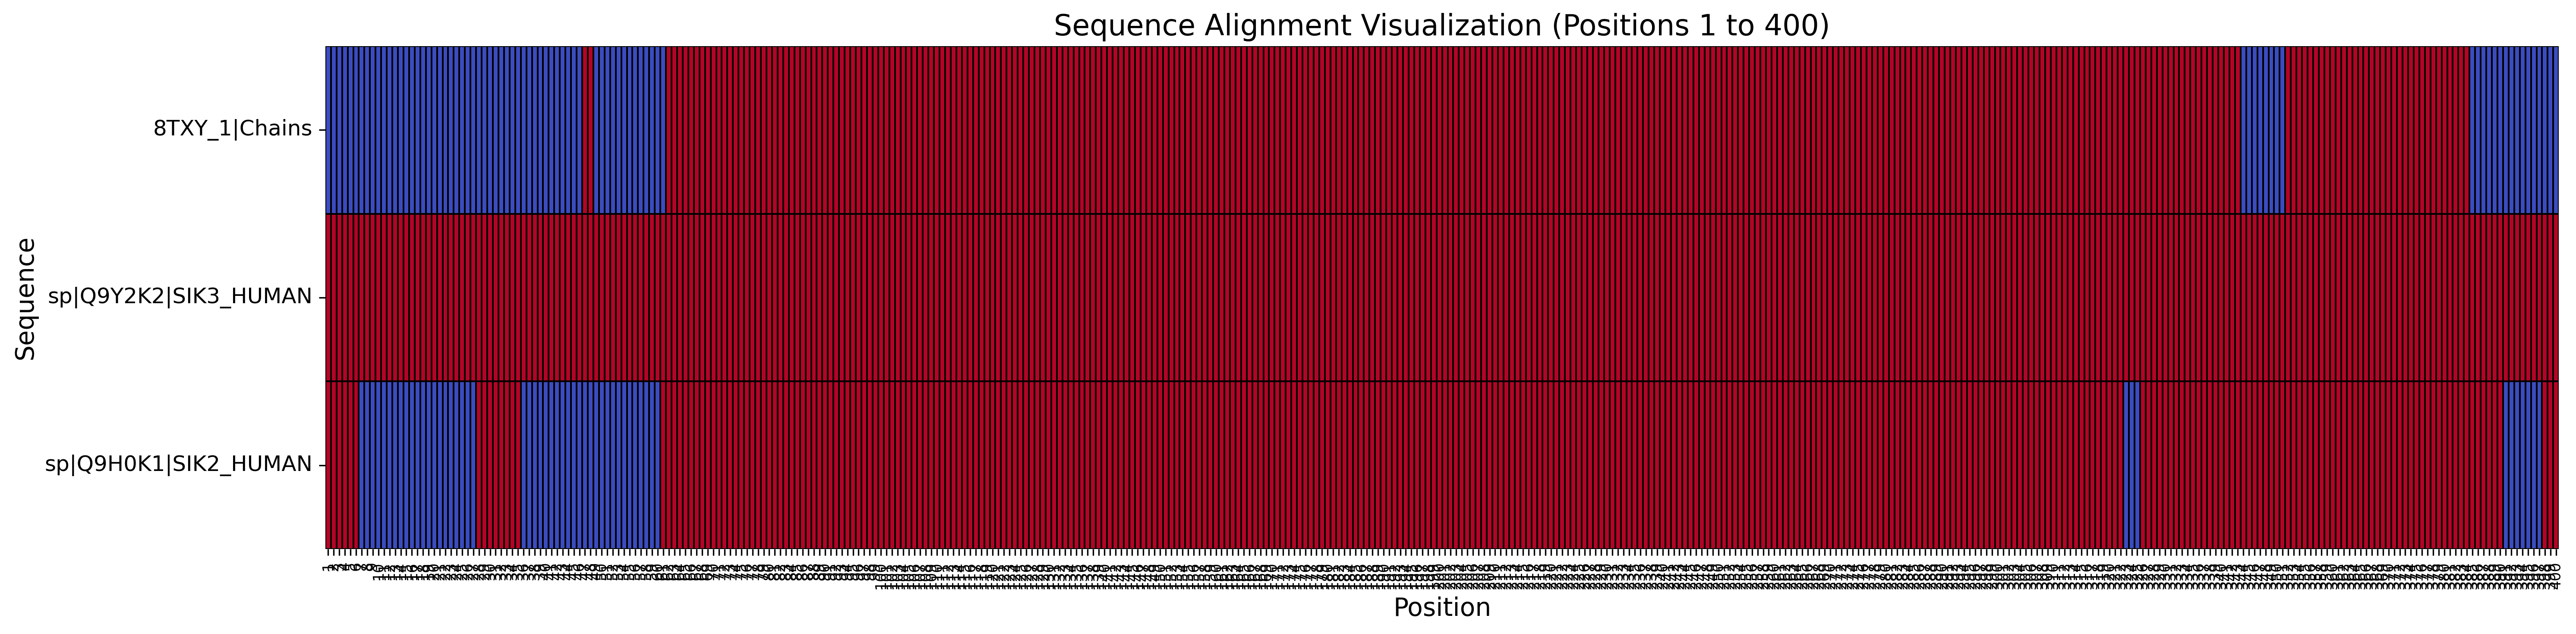

In [ ]:
from Bio import AlignIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Path to the alignment file
alignment_file = "rcsb_pdb_8TXY.aln"

# Read the alignment result
alignment = AlignIO.read(alignment_file, "clustal")

# Function to convert alignment to a 2D numpy array
def alignment_to_array(alignment, start=0, end=None):
    alignment_length = alignment.get_alignment_length()
    if end is None:
        end = alignment_length
    sequences = [str(record.seq[start:end]) for record in alignment]
    array = np.array([list(seq) for seq in sequences])
    return array, end - start

# Function to calculate conservation scores
def calculate_conservation(array):
    conservation = []
    for col in range(array.shape[1]):
        column = array[:, col]
        count = Counter(column)
        most_common = count.most_common(1)[0][1]
        score = most_common / len(column)
        conservation.append(score)
    return np.array(conservation)

# Function to plot alignment segment with conservation scores
def plot_alignment_segment(alignment, start, end, conservation_scores):
    align_array, align_length = alignment_to_array(alignment, start, end)

    # Custom colormap for alignment visualization
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
    sns.heatmap((align_array != '-').astype(int), cmap=cmap, cbar=False, ax=ax, linewidths=.5, linecolor='black')

    ax.set_yticks(np.arange(align_array.shape[0]) + 0.5)
    ax.set_yticklabels([record.id for record in alignment], rotation=0, fontsize=12)
    ax.set_xticks(np.arange(align_length) + 0.5)
    ax.set_xticklabels(np.arange(start + 1, end + 1), rotation=90, fontsize=8)

    for idx in range(align_length):
        ax.annotate(f"{conservation_scores[start + idx]:.2f}", xy=(idx + 0.5, -0.5),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='center', fontsize=8, color='black')

    plt.title(f"Sequence Alignment Visualization (Positions {start+1} to {end})", fontsize=16)
    plt.xlabel("Position", fontsize=14)
    plt.ylabel("Sequence", fontsize=14)
    plt.tight_layout()

    plt.show()

# Specify the range of positions to visualize
segment_size = 400  # Adjust the size of the segment to cover the first 400 positions
total_length = alignment.get_alignment_length()

# Calculate conservation scores for the entire alignment
alignment_array, _ = alignment_to_array(alignment)
conservation_scores = calculate_conservation(alignment_array)

# Visualize the specified segment (first 400 positions)
start = 0
end = min(start + segment_size, total_length)
plot_alignment_segment(alignment, start, end, conservation_scores)


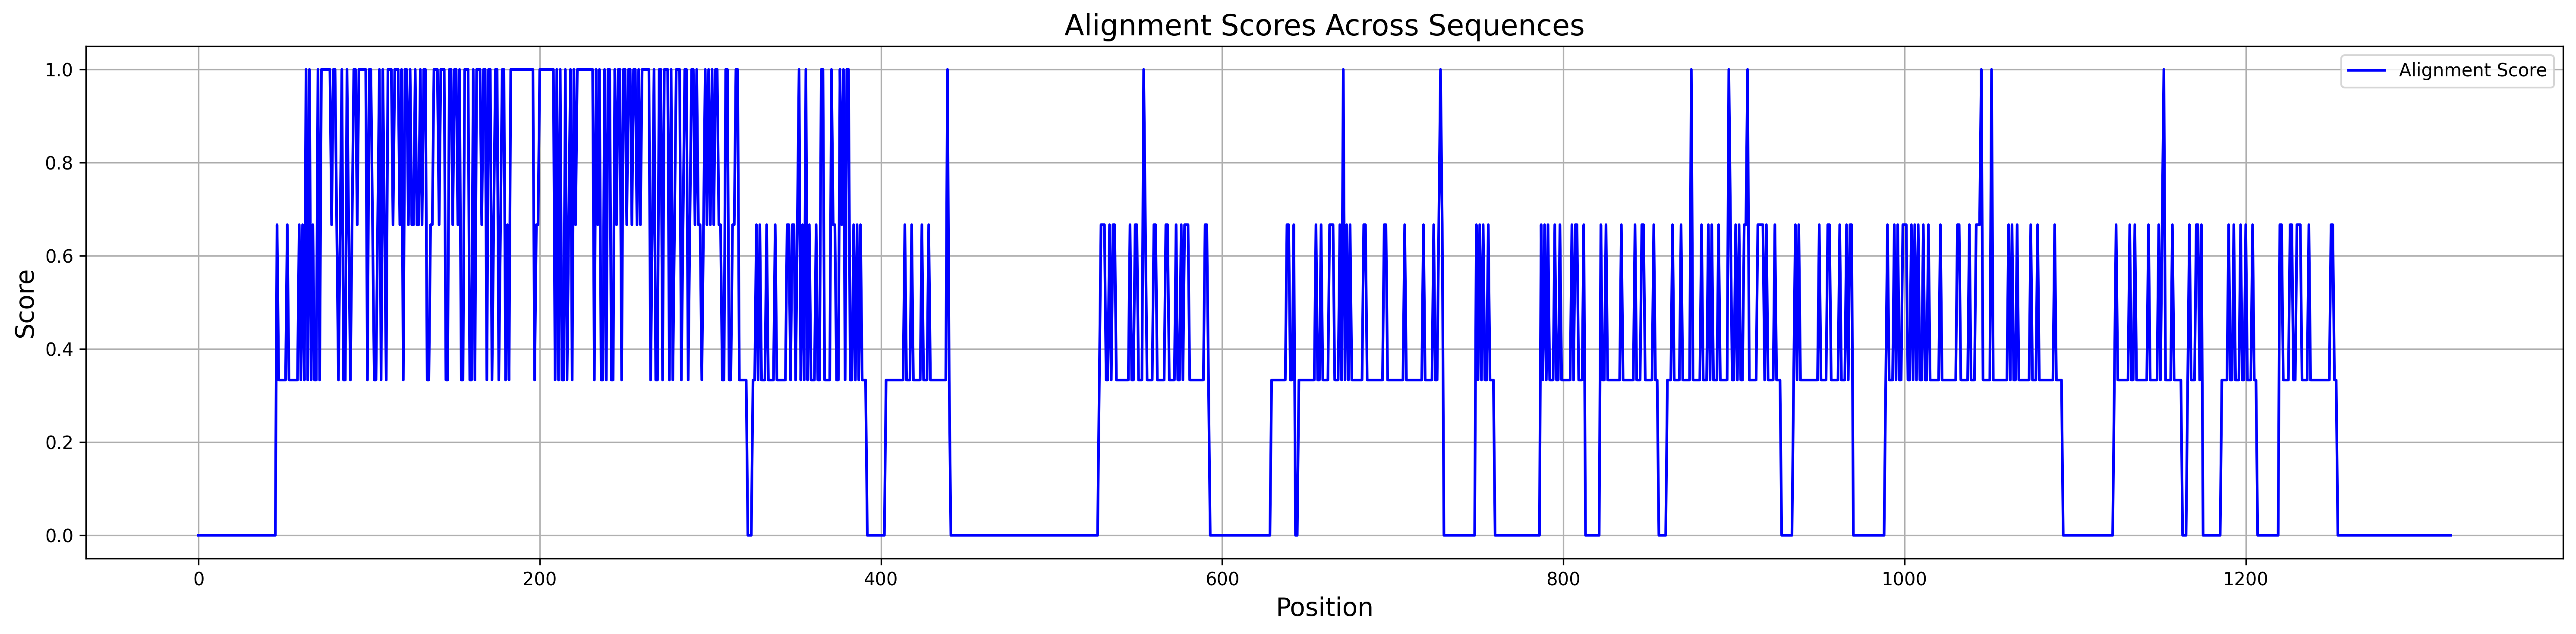

In [ ]:
from Bio import AlignIO, SeqIO
from Bio.Align import MultipleSeqAlignment
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the alignment file
alignment_file = "Q7KZI7.aln"
alignment = AlignIO.read(alignment_file, "clustal")

# Calculate alignment scores (simple example: match = 1, mismatch/gap = 0)
def calculate_scores(alignment):
    num_sequences = len(alignment)
    alignment_length = alignment.get_alignment_length()
    scores = np.zeros(alignment_length)

    for i in range(alignment_length):
        column = alignment[:, i]
        match_count = sum(1 for x in column if x == column[0] and x != '-')
        scores[i] = match_count / num_sequences

    return scores

# Get alignment scores
scores = calculate_scores(alignment)

# Plot alignment scores
plt.figure(figsize=(20, 5), dpi=300)
plt.plot(scores, label='Alignment Score', color='blue')
plt.title("Alignment Scores Across Sequences", fontsize=16)
plt.xlabel("Position", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


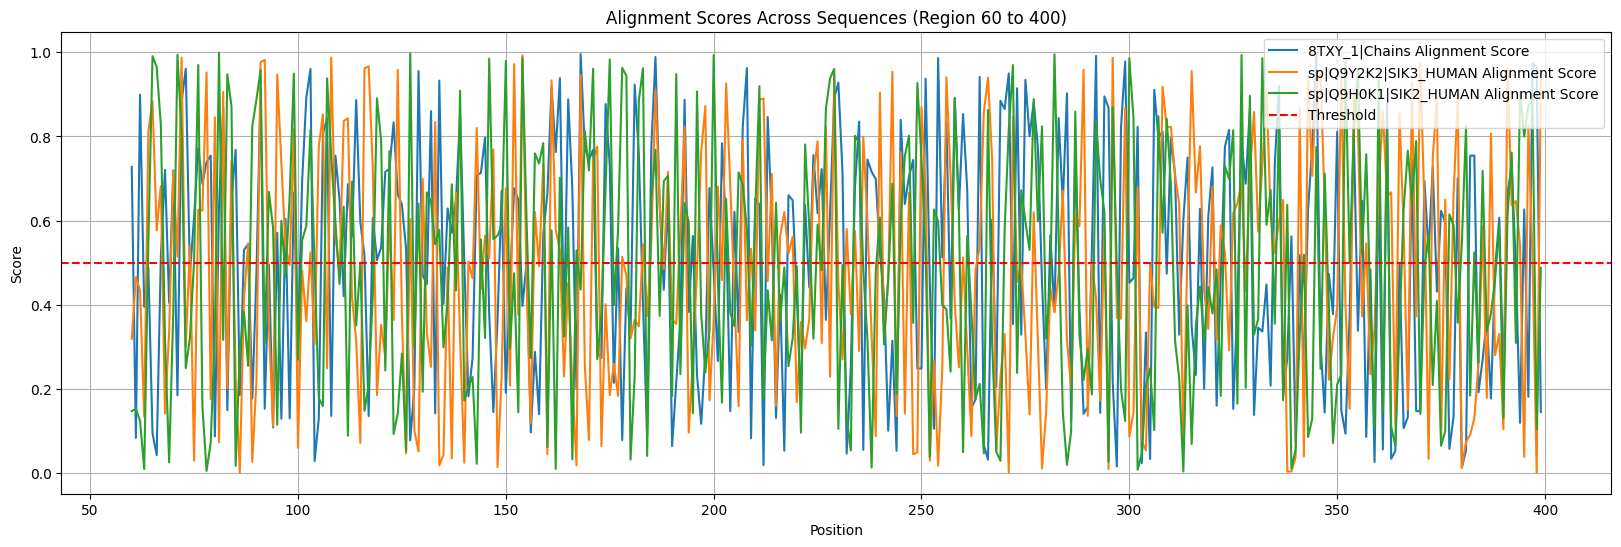

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dummy data for demonstration purposes (replace with actual data loading if needed)
sequence_names = ['8TXY_1|Chains', 'sp|Q9Y2K2|SIK3_HUMAN', 'sp|Q9H0K1|SIK2_HUMAN']
alignment_scores = np.random.rand(3, 1321)  # Replace with real alignment scores

# Create a DataFrame for easier handling
df = pd.DataFrame(alignment_scores.T, columns=sequence_names)

# Define the region to visualize
start_pos = 60
end_pos = 400
positions = np.arange(start_pos, end_pos)

# Extract the scores for the specified region
region_scores = df.iloc[start_pos:end_pos]

# Plot the alignment scores for the specified region
fig, ax = plt.subplots(figsize=(20, 6))
for seq in sequence_names:
    ax.plot(positions, region_scores[seq], label=f'{seq} Alignment Score')

# Add a threshold line
threshold = 0.5
ax.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

# Add titles and labels
plt.title('Alignment Scores Across Sequences (Region 60 to 400)')
plt.xlabel('Position')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('alignment_scores_region_60_to_400.png')

# Display the plot
plt.show()
